# **Lecture 21 - Data Visualization - Best Practices and More ggplot2**

---

<br>

### Packages

In [ ]:
# install dslabs package
install.packages("dslabs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load ggplot2 library (already installed in colab!)
library(ggplot2)       # for nice plotting
library(RColorBrewer)  # to change color scheme in plots
library(dslabs)        # for gapminder dataset

---

<br>

### Data Visualization - Principles and Best Practices

* When creating data visualizations, there are several widely accepted principles to consider

* These principles are considered "best practices" to align visualizations with our understanding of how humans detect and compare patterns visually
  * i.e. we want to make it as easy as possible for humans to interpret our data

* The goal of a data visualization is to effectively, ***and ethically***, communicate information to your intended audience, even if that audience is yourself!

* Although there are many ways to visualize information, some approaches are much more effective than others

#### Avoid Pie Charts

* In the past, you may have used pie charts to visualize data

* In general, pie charts are not a favorable data visualization since humans are not good at quantifying information from area or angles

* For example, the pie chart below shows the usage of different browsers in 2015

* Which has a higher percentage of usage, Chrome or Internet Explorer (IE)? And by how much?

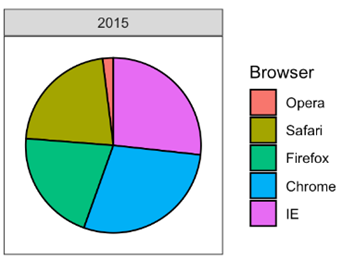

* From the pie chart, it is difficult to determine which is larger, let alone by which amount!

* A better approach is to use a barplot

* Humans are much better at quantifying information based on length

* We immediately see that Chrome had higher usage that IE in 2015

* We also see that Chrome usage was at ~29% and IE was at ~27%

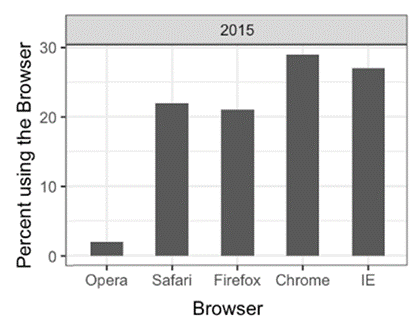

* If for some reason, you must create a pie chart, you should include your summary information as text

* This eliminates any need to quantify information from area or angles only

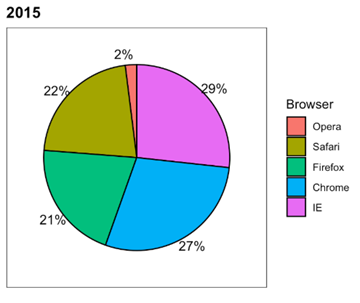

#### Knowing When to Include Zero

* When using barplots to display data, it is misleading (and unethical) to exclude zero from your plot (always include zero in barplots!)

* For example, the plot below was reported on a partisan news channel of the number of apprehensions at our southwest US border

* Since the plot does NOT include zero, at first glance, it appears as if the number of apprehensions is increasing exponentially

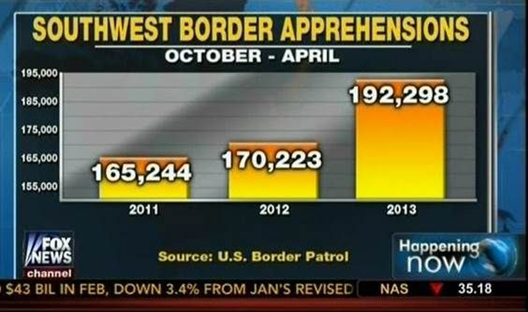

* After including zero, we still see an increase

* However, the increase is much less pronounced than the barplot reported by the news channel

* Excluding zero from these plots is misleading AND unethical as the audience may not have the knowledge to see past the bias representation of the data

* It is YOUR responsibility to ensure that you convey the proper message to your audience

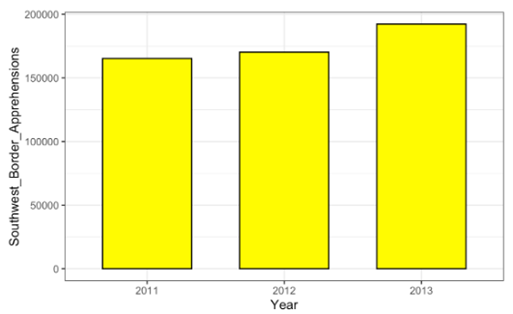

##### More (bad) examples of excluding zero...

* Bad

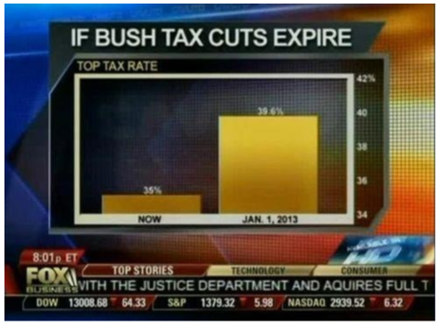

* Good

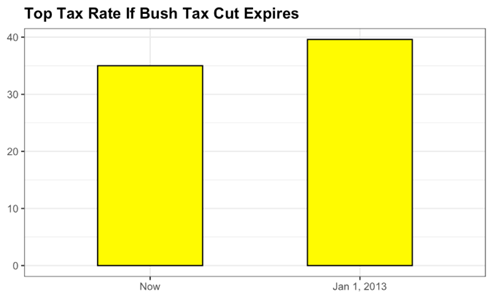

* Bad

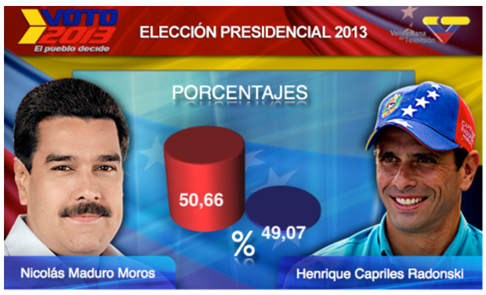

* Good

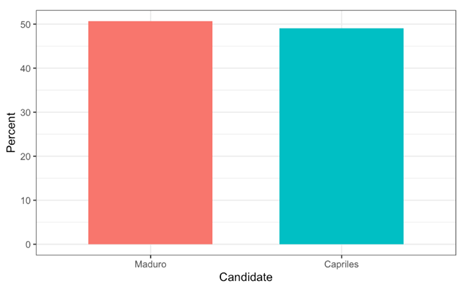

#### When do we NOT need to include zero?

* Including zero is often unnecessary if

  * including zero makes it difficult to make comparisons

  * you are visualizing relationships relative to their variability

  * zero is not conceptually relevant



* This is typically the case in
  * histograms
  * scatterplots
  * boxplots

* For example, including zero in the left plot below

  * does not include additional information

  * makes it difficult to compare the groups

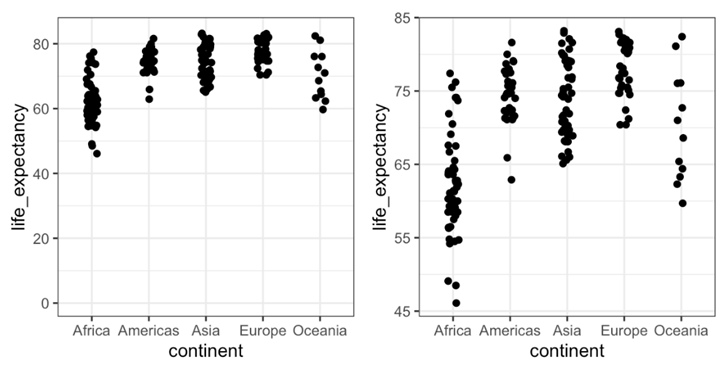

---

<br>

#### Avoid Three-dimensional Plots

* Avoid unecessarily plotting 2D data in a 3D rendering
  * It's 2D data, why plot it in 3d???

* These representations just make it more difficult to interpret

* For example, avoid representations below

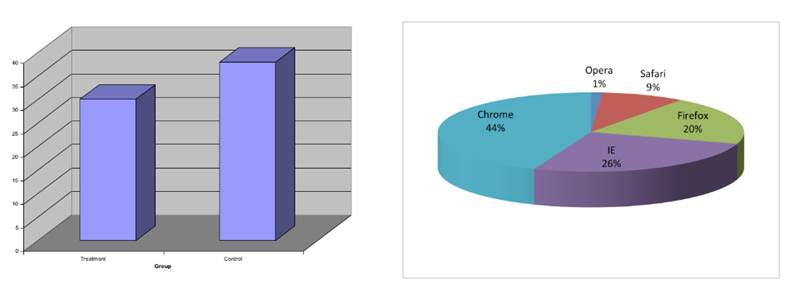

* Why would we plot this in 3D?

* Is the survival rate different between Drug A and Drug C and log dose 9?

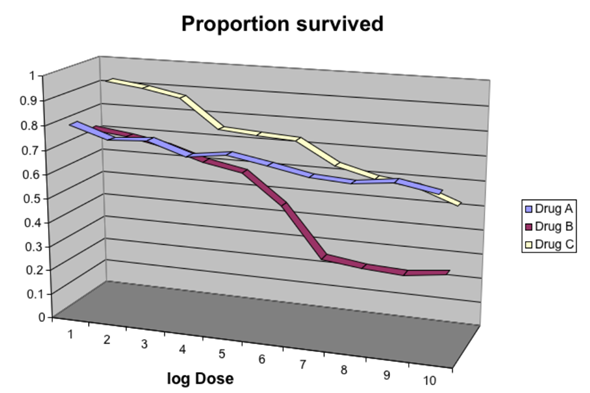

* Comparisons are much easier in 2D!

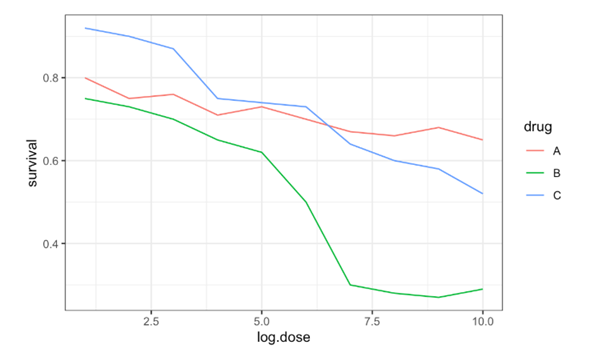

* It is reasonable to plot data in 3D if the data is actually three-dimensional
  * i.e. data across three axes

* However, it will still be difficult for your audience to interpret the numbers due to the 3 axes being visualized in 2D on our screens

* ***Only plot 3D data if you can introduce movement and interactivity***
  * [example](https://www.data-to-viz.com/caveat/3d.html)

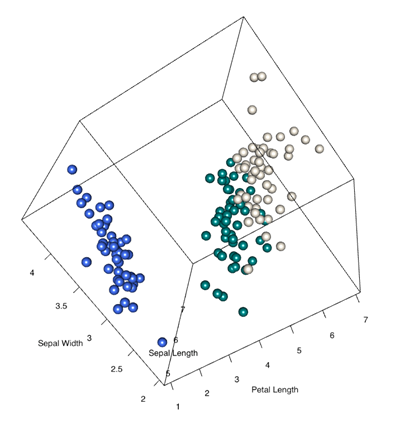

* What is a better alternative than 3 axes?
  * Introduce color, shape, and size!

---

<br>

#### Ordering Categories using `reorder()`

* Ordering data in your ***barplots*** and ***boxplots*** can make it easier to compare between entities or groups

* For example, the barplot below visualizes the `mpg` of each vehicle in the `mtcars` dataset

* Note the vehicles are NOT ordered by mpg

* Which vehicle has a better mpg?
  * Mazda Rx4

    OR

  * Volvo 142E

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


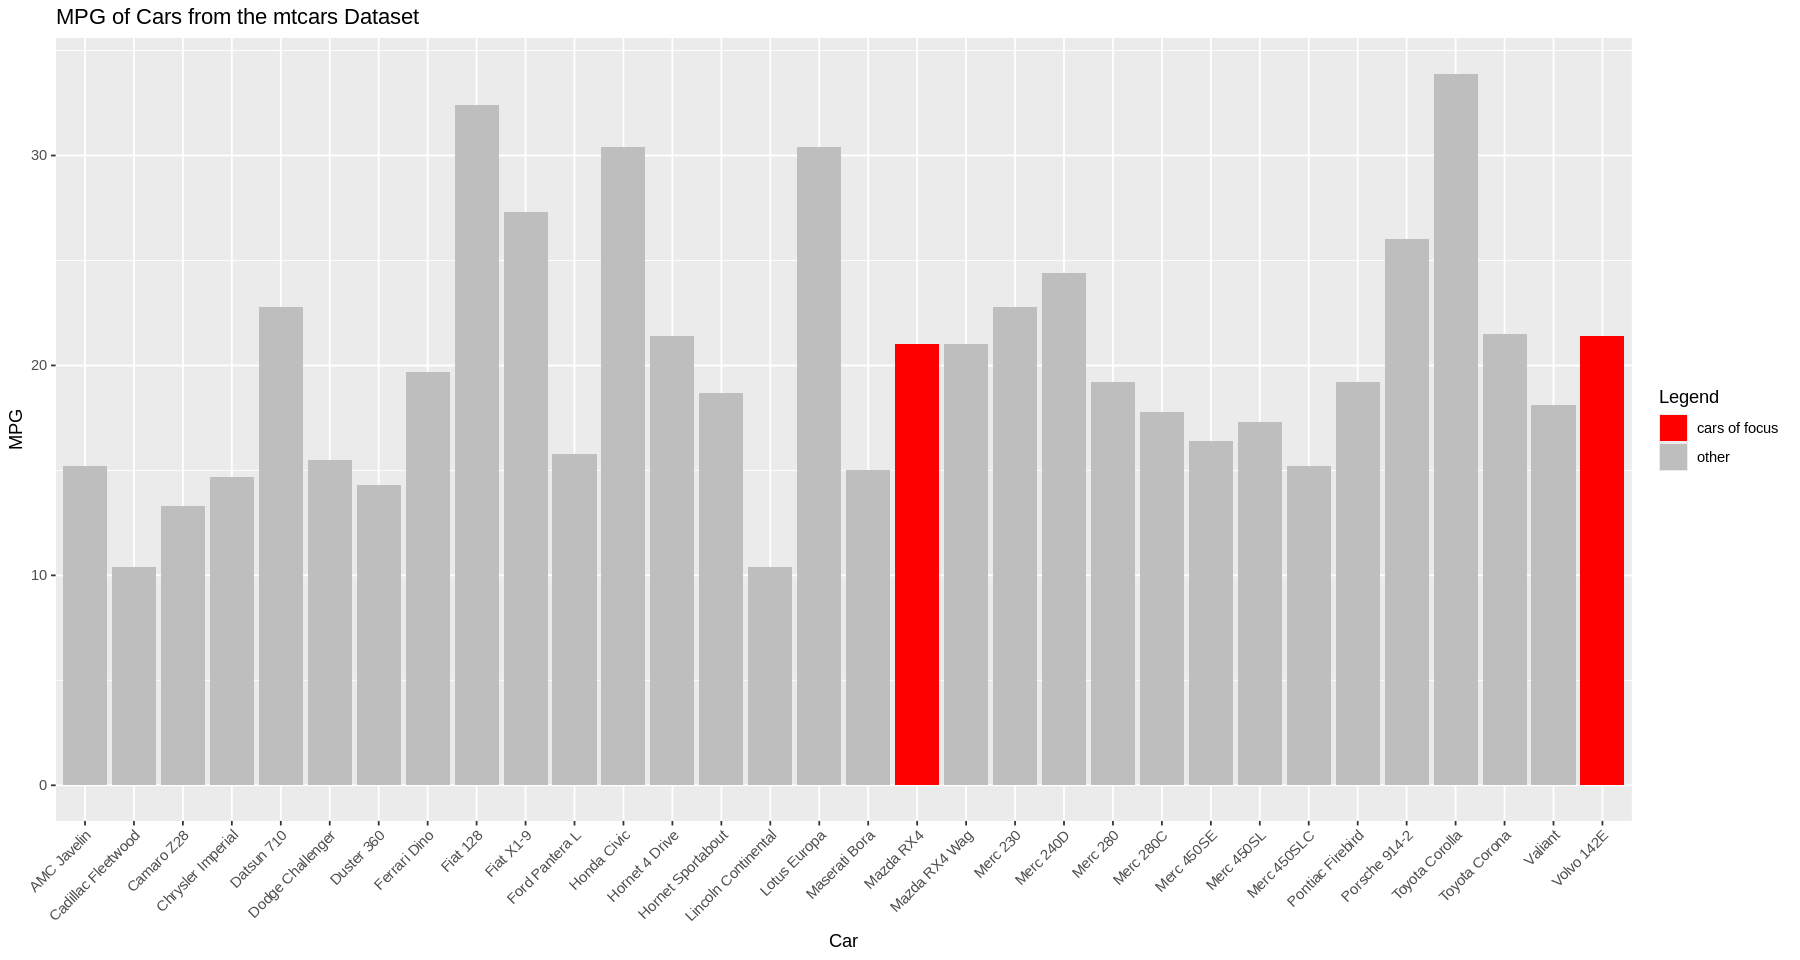

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)

# create a new column for car names
mtcars$Car <- rownames(mtcars)

# different colors for mazada rx4 and volvo 142E
mtcars$Highlight <- ifelse(mtcars$Car %in% c("Mazda RX4", "Volvo 142E"),
                           "cars of focus",
                           "other")

# plot barplot
ggplot(data = mtcars, aes(x = Car, y = mpg, fill = Highlight)) +
  geom_bar(stat = "identity") +                                              # plot actual values (not counts)
  scale_fill_manual(values = c("cars of focus" = "red", "other" = "gray")) + # assign colors
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +                 # rotate labels
  labs(title = "MPG of Cars from the mtcars Dataset",
       x     = "Car",
       y     = "MPG",
       fill  = "Legend")

* How about if the plot is ordered by `mpg`?

* From the plot below, it is now obvious that the Volvo 142E has a higher `mpg` than the Mazda Rx4

* Note the script `reorder(Car, -mpg)` orders the created `Car` variable by `mpg` in decreasing order using the `-`

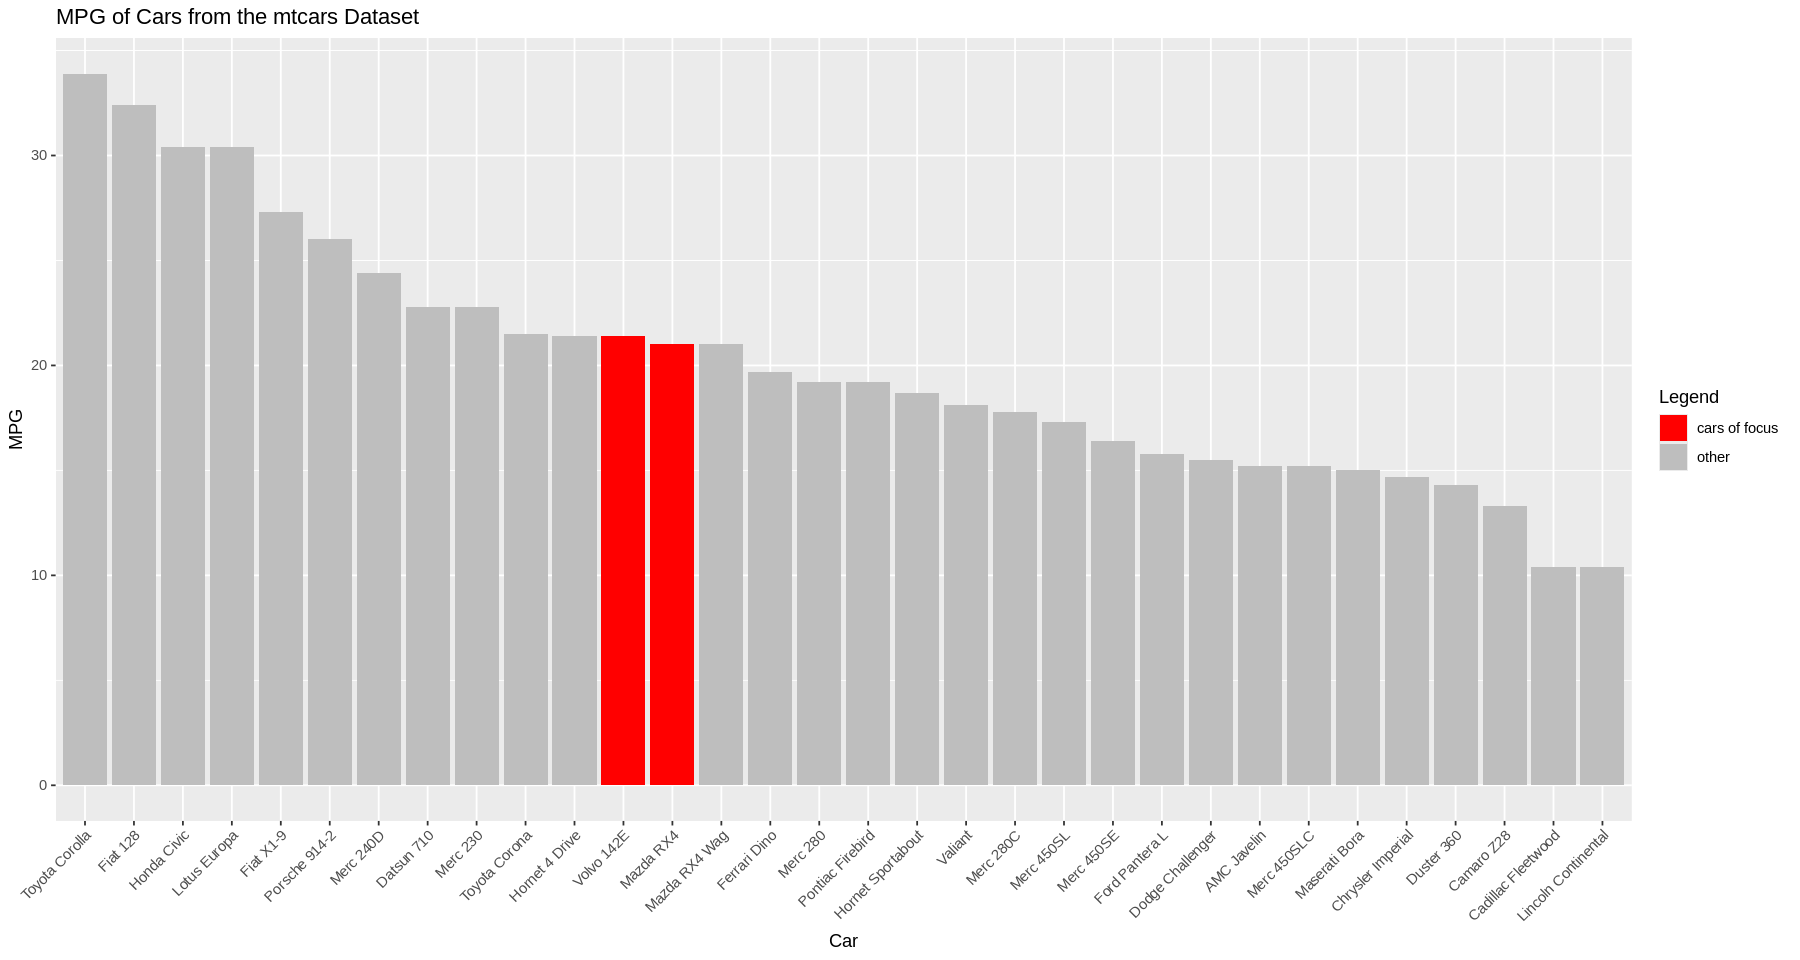

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)

# create a new column for car names
mtcars$Car <- rownames(mtcars)

# different colors for mazada rx4 and volvo 142E
mtcars$Highlight <- ifelse(mtcars$Car %in% c("Mazda RX4", "Volvo 142E"),
                           "cars of focus",
                           "other")

# plot barplot
ggplot(data = mtcars, aes(x = reorder(Car, -mpg), y = mpg, fill = Highlight)) +
  geom_bar(stat = "identity") +                                              # plot actual values (not counts)
  scale_fill_manual(values = c("cars of focus" = "red", "other" = "gray")) + # assign colors
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +                 # rotate labels
  labs(title = "MPG of Cars from the mtcars Dataset",
       x     = "Car",
       y     = "MPG",
       fill  = "Legend")

* For boxplots, you can order categories by either the mean, median, interquartile range, variance, etc.

* Mean or median is most commonly used

* Without ordering

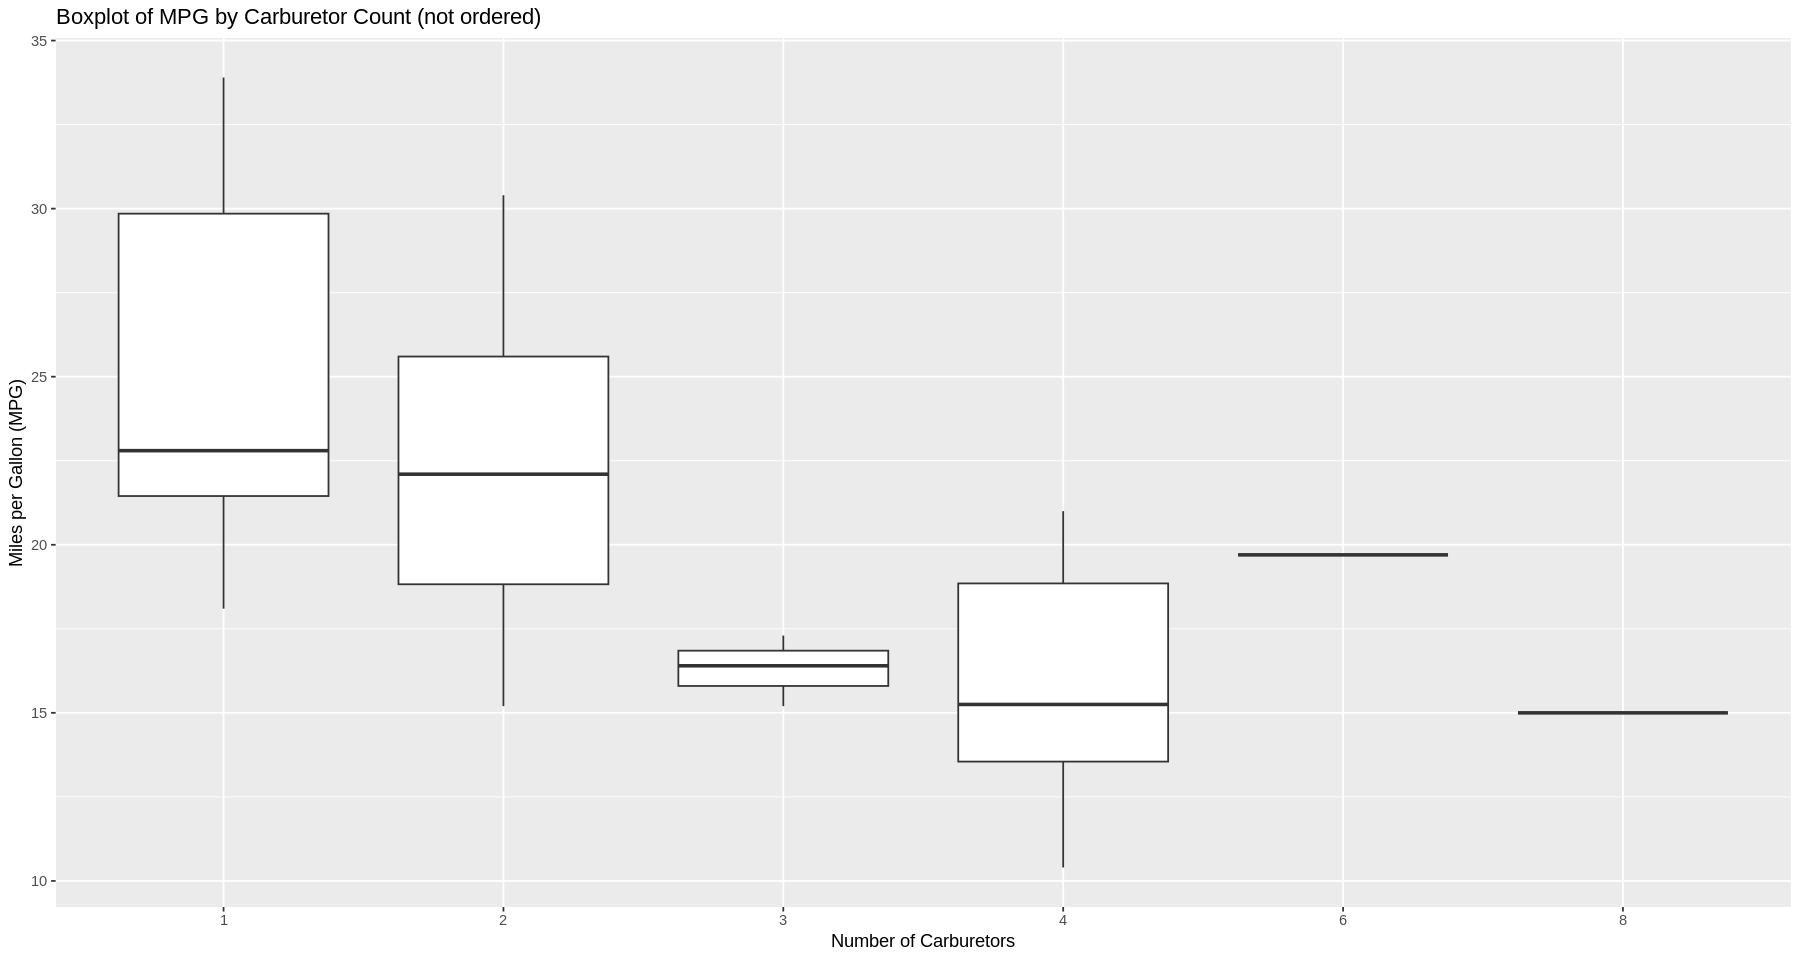

In [ ]:
# without ordering
ggplot(mtcars, aes(x = factor(carb), y = mpg)) +
  geom_boxplot() +
  labs(title = "Boxplot of MPG by Carburetor Count (not ordered)",
       x     = "Number of Carburetors",
       y     = "Miles per Gallon (MPG)")

* With ordering

* Note the script `reorder(factor(carb), mpg, FUN = median)` orders the `carb` variable by median `mpg` in decreasing order using the `-`

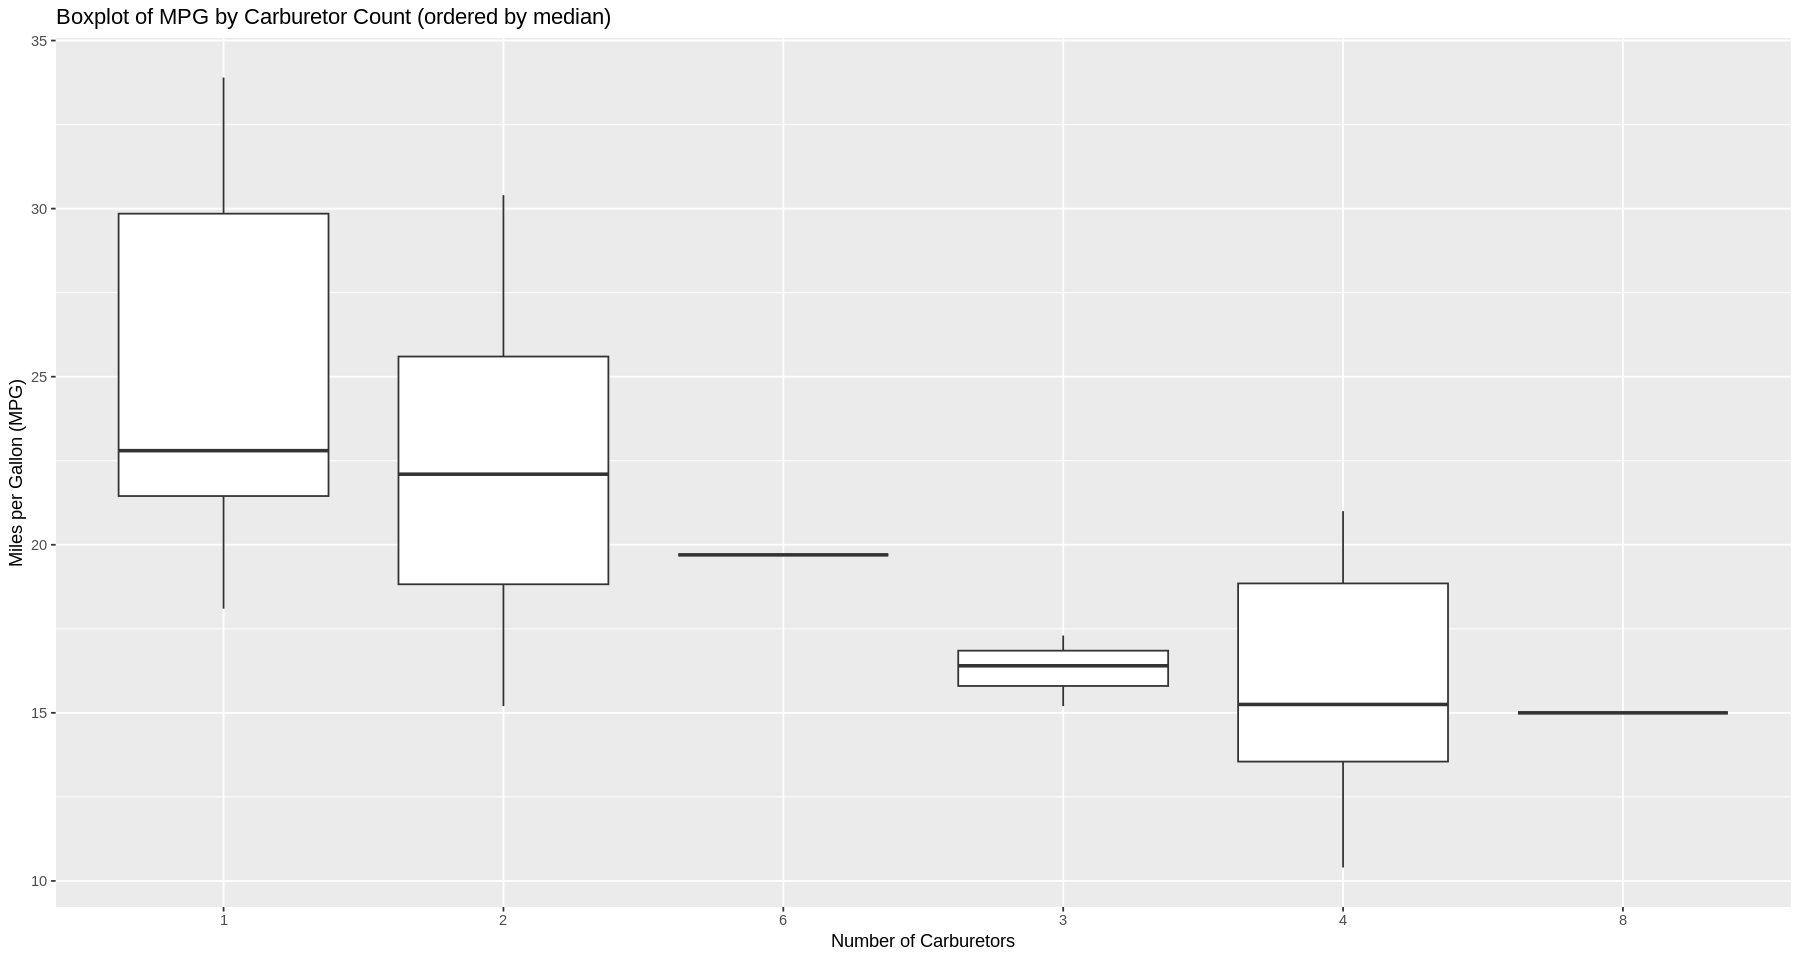

In [ ]:
# with ordering
ggplot(mtcars, aes(x = reorder(factor(carb), -mpg, FUN = median), y = mpg)) +
  geom_boxplot() +
  labs(title = "Boxplot of MPG by Carburetor Count (ordered by median)",
       x     = "Number of Carburetors",
       y     = "Miles per Gallon (MPG)")

---

<br>

#### Showing data using `geom_jitter()`

* For complete transparency, its helps to show your actual data when plotting boxplots

* The boxplot below is the same as above, except we include the following ggplot layer

  `geom_jitter(width = 0.05, alpha = 0.5)`

* `geom_jitter()` includes the actual data with some variation in the x-axis direction
  * `width` - controls how much jitter (variation) to include
  * `alpha` - controls the transparency. More transparency is appropriate for a large number of data points

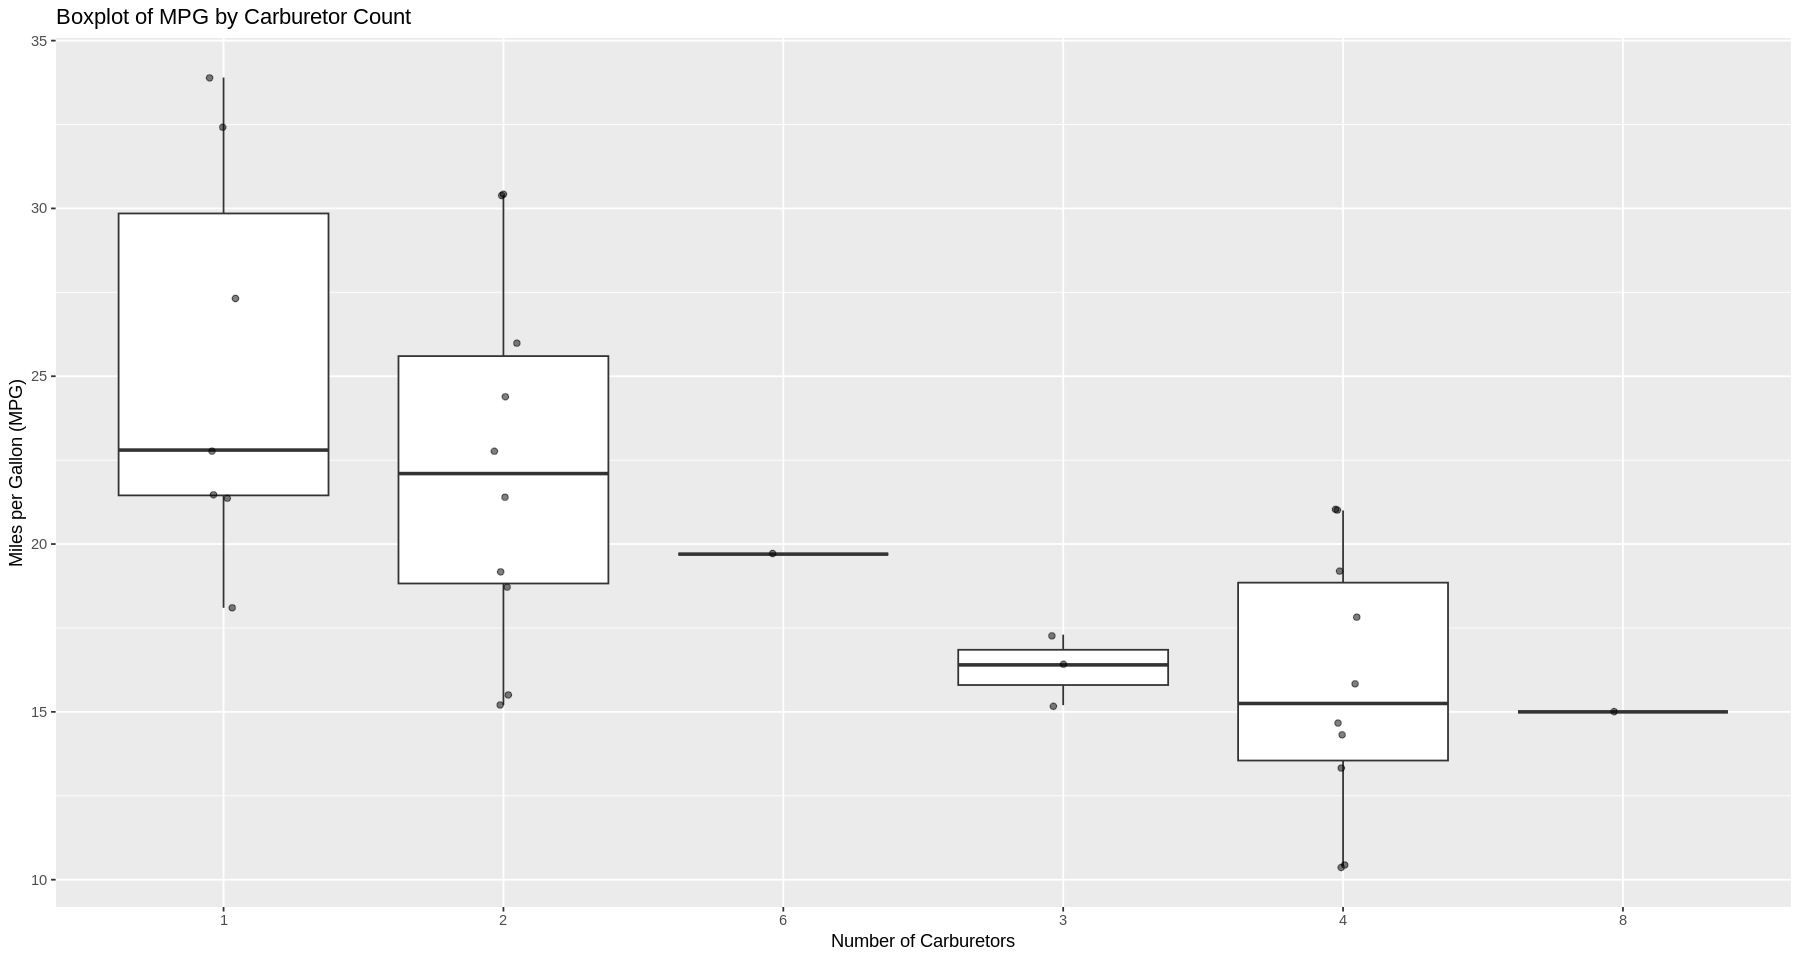

In [ ]:
# with ordering
ggplot(mtcars, aes(x = reorder(factor(carb), -mpg, FUN = median), y = mpg)) +
  geom_boxplot() +
  geom_jitter(width = 0.05, alpha = 0.5) +
  labs(title = "Boxplot of MPG by Carburetor Count",
       x     = "Number of Carburetors",
       y     = "Miles per Gallon (MPG)")

---

<br>

#### Transformations

* If your data is severely right skewed, it is very common to log transform your data for your visualization

* Other transformations can also be used depending on the shape of your data distribution

* For example, consider the script below, which plots `population` vs `continent` using a boxplot in `ggplot`

* The `population` variable is severely right skewed, making it difficult to compare populations between continents

Warning message:
“Removed 185 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


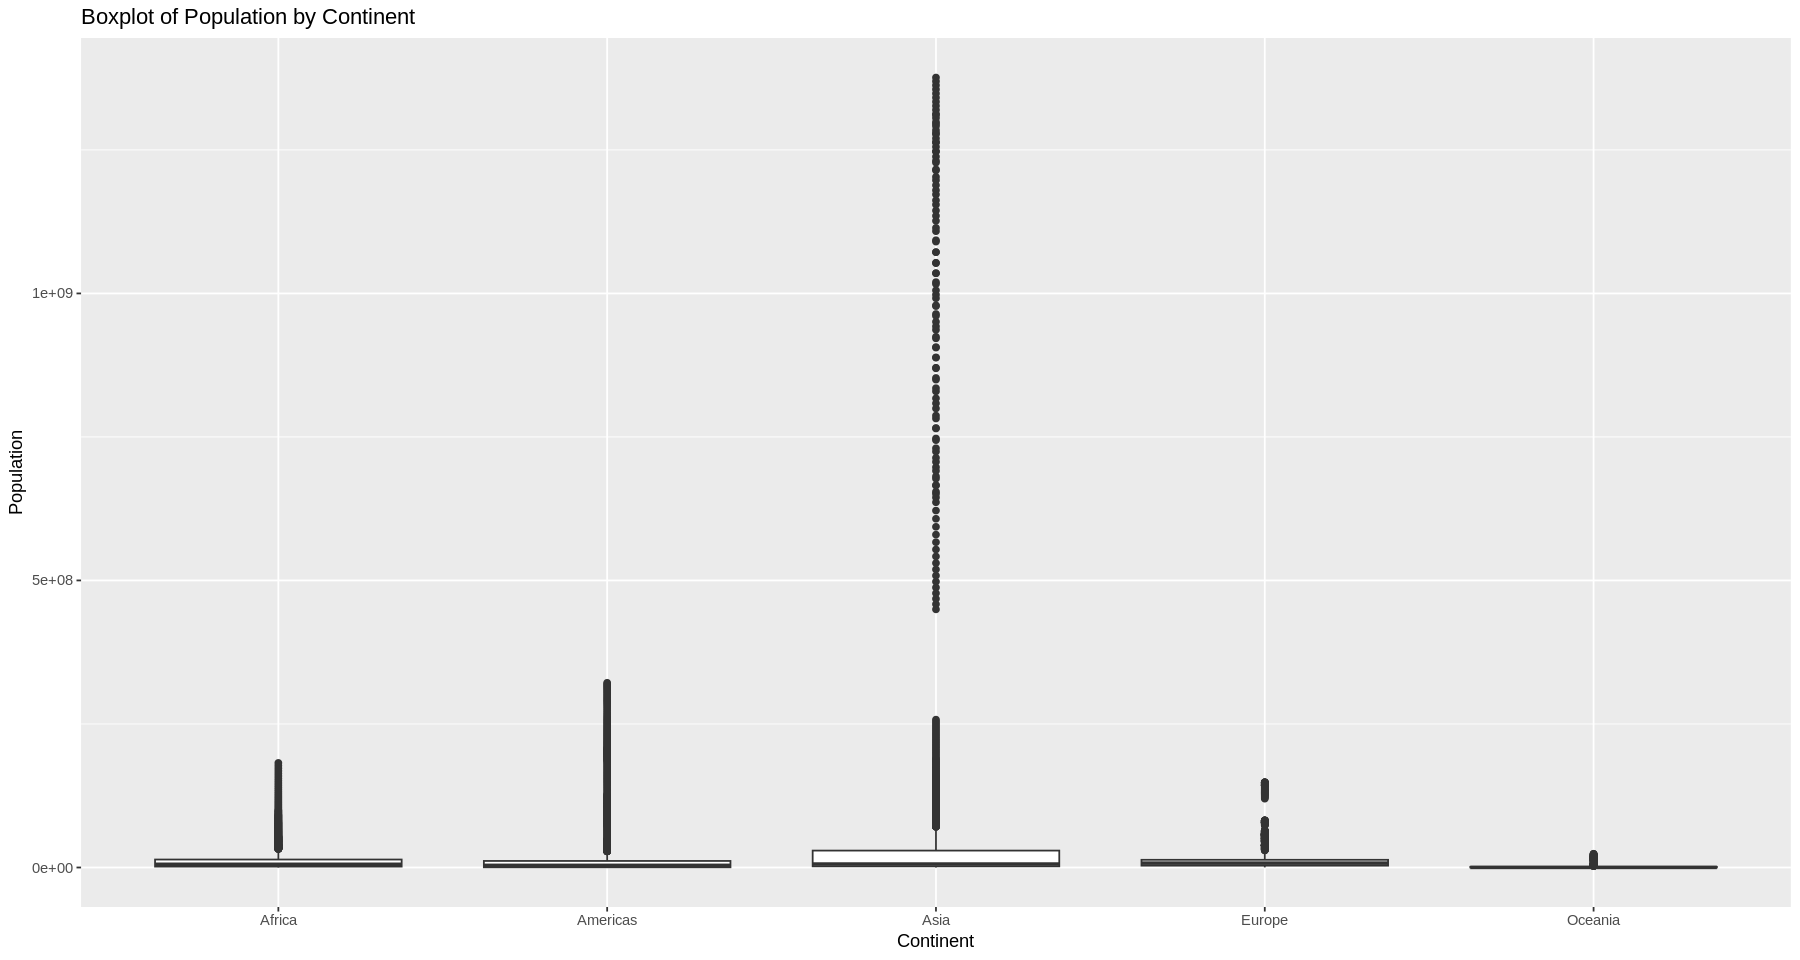

In [ ]:
# plot without log transformation
ggplot(data = gapminder, aes(x = continent, y = population)) +
  geom_boxplot() +
  labs(title = "Boxplot of Population by Continent",
      x     = "Continent",
      y     = "Population")

* Plotting the `log(population)` makes the visual comparisons across continents much easier

Warning message:
“Removed 185 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


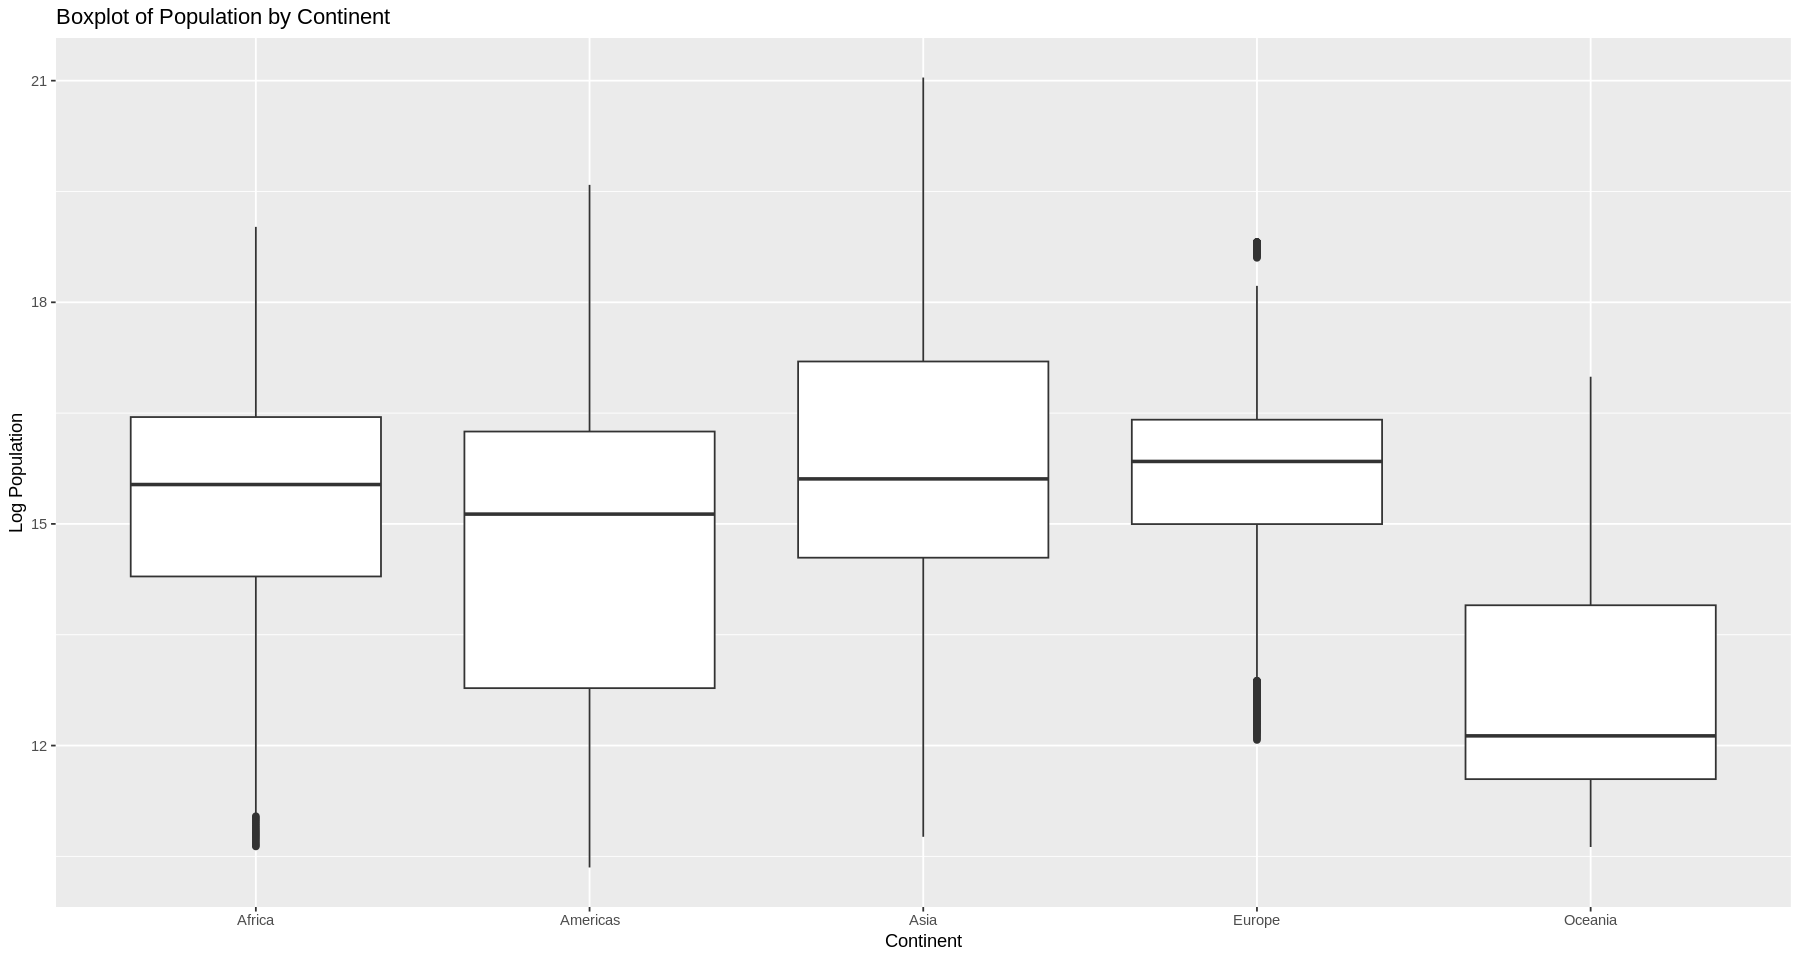

In [ ]:
# plot with log population
ggplot(data = gapminder, aes(x = continent, y = log(population))) +
  geom_boxplot() +
  labs(title = "Boxplot of Population by Continent",
      x     = "Continent",
      y     = "Log Population")

---

<br>

#### Plots over time

* Trends over time should always be plotted using a line or line with points (not points only as in a scatterplot)

* We can use the `geom_line()` geometry layer to plot data over time

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


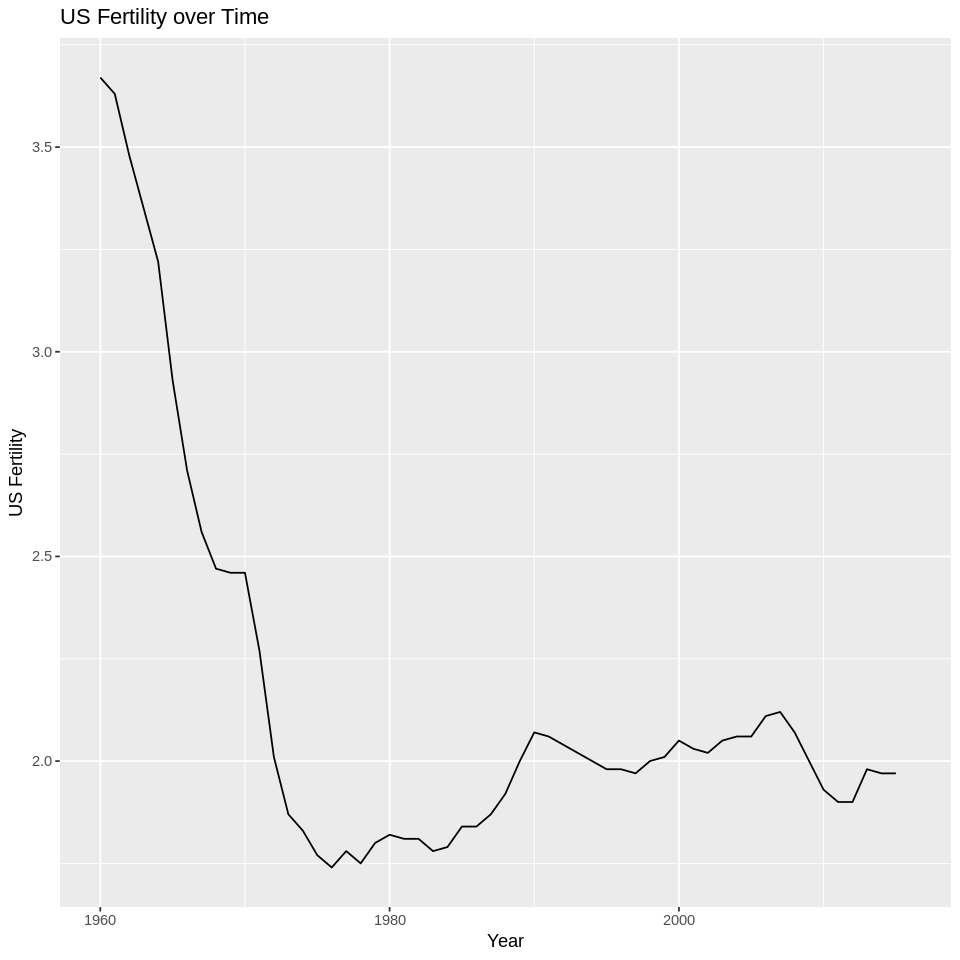

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# subset to United States
gapminder_usa <- gapminder[gapminder$country == "United States",]

# plot fertility over time
ggplot(data = gapminder_usa, aes(x = year, y = fertility)) +
  geom_line() +
  #geom_point() +  # plot line with points
  labs(title = "US Fertility over Time",
      x     = "Year",
      y     = "US Fertility")

---

<br>

#### Common Axes and `facet_wrap()`

* When plotting multiple plots for comparison, always use the same axes!!!

* If you do not use the same axes, the visualization can be misleading

* For example, the two histograms below visualize `mpg` separately for automatic and manual transmissions

* Because they are plotted on different axes (10-25 for automatic and 15-35) for manual, it appears as if they are similar in `mpg`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


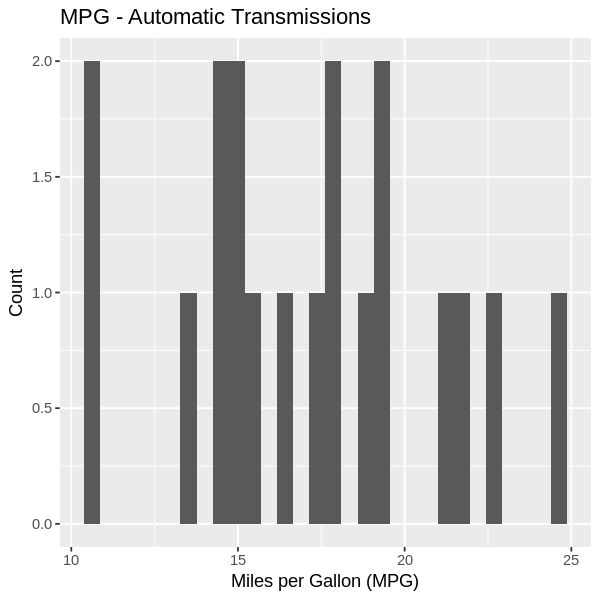

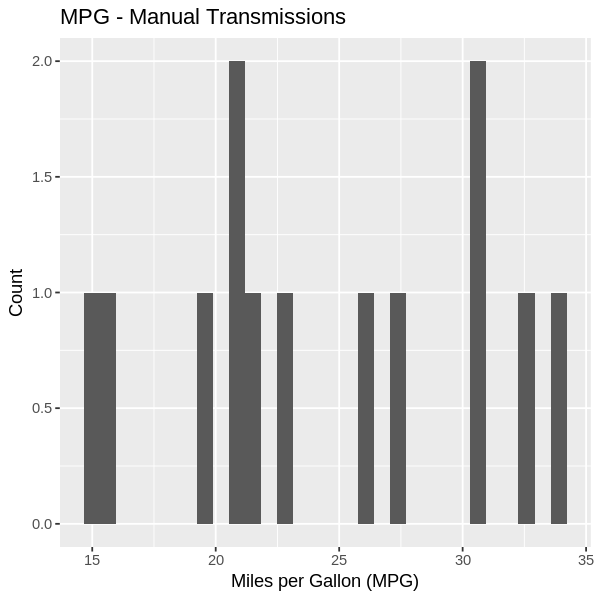

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)

# convert am to factor and change levels
mtcars$am <- factor(mtcars$am)
levels(mtcars$am) <- c("automatic", "manual")

# automatic transmissions
ggplot(mtcars[mtcars$am == "automatic", ], aes(x = mpg)) +
  geom_histogram() +
  labs(title = "MPG - Automatic Transmissions",
       x = "Miles per Gallon (MPG)",
       y = "Count")

# manual transmissions
ggplot(mtcars[mtcars$am == "manual", ], aes(x = mpg)) +
  geom_histogram() +
  labs(title = "MPG - Manual Transmissions",
       x = "Miles per Gallon (MPG)",
       y = "Count")

* A way to enforce the same axes is the `facet_wrap()` function

* The script below uses the script `facet_wrap(~ am, nrow = 2, ncol = 1)` to plot the histograms of `mpg` by each value of `am` on the same axes
  * `nrow` - argument specifies how many rows of plots
  * `ncol` - argument specifies how many columns of plots

* On the same axes, we see that automatic transmissions have a lower `mpg` overall

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


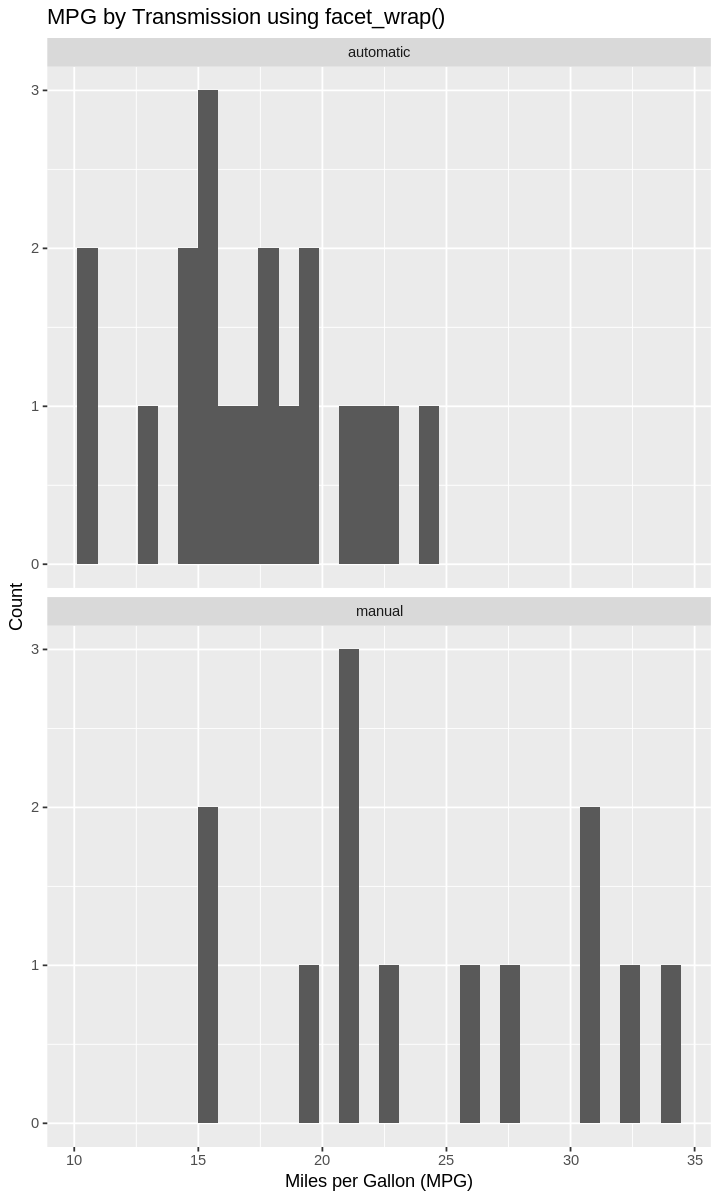

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 10)

# plotting mpg histograms using facet_wrap()
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram() +
  facet_wrap(~ am, nrow = 2, ncol = 1) +
  labs(title = "MPG by Transmission using facet_wrap()",
       x = "Miles per Gallon (MPG)",
       y = "Count")

* `facet_wrap()` allows you to plot two variables on the same axes

* The layer `facet_wrap(gear ~ am)` plots the histograms for `mpg` by both `gear` and `am`

* The topleft plot shows the histogram of `mpg` for automatic transmissions with 3 forward gears

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


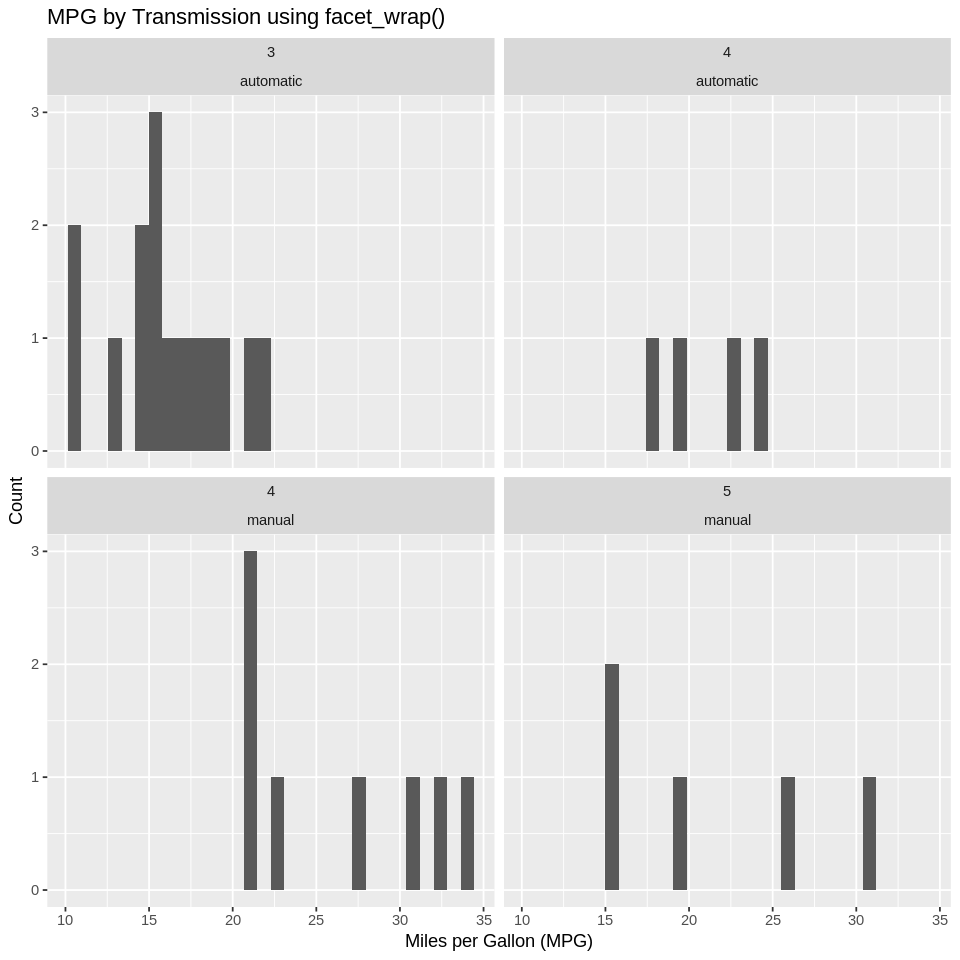

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# plotting mpg histograms using facet_wrap()
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram() +
  facet_wrap(gear ~ am, nrow = 2, ncol = 2) +
  labs(title = "MPG by Transmission using facet_wrap()",
       x = "Miles per Gallon (MPG)",
       y = "Count")

---

<br>

#### Grouped boxplots using `fill = ` or `facet_wrap()`

* Last time, we visualized multiple categorical variables in boxplots using the `fill = ` argument (see below)

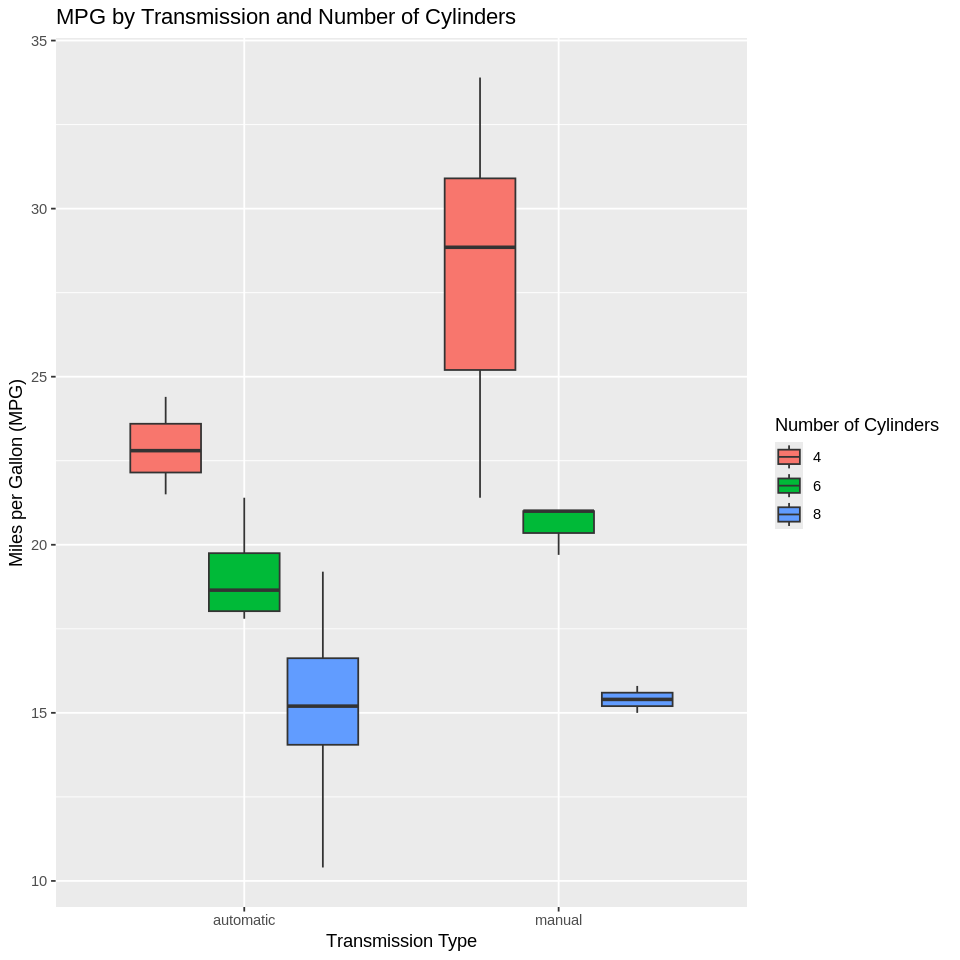

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# plotting mpg by transmission and cyl
ggplot(mtcars, aes(x = am, y = mpg, fill = factor(cyl))) +
  geom_boxplot() +
  labs(title = "MPG by Transmission and Number of Cylinders",
       x = "Transmission Type",
       y = "Miles per Gallon (MPG)",
       fill = "Number of Cylinders")

* We can also use `facet_wrap()` to plot boxplots across categories of another categorical variable

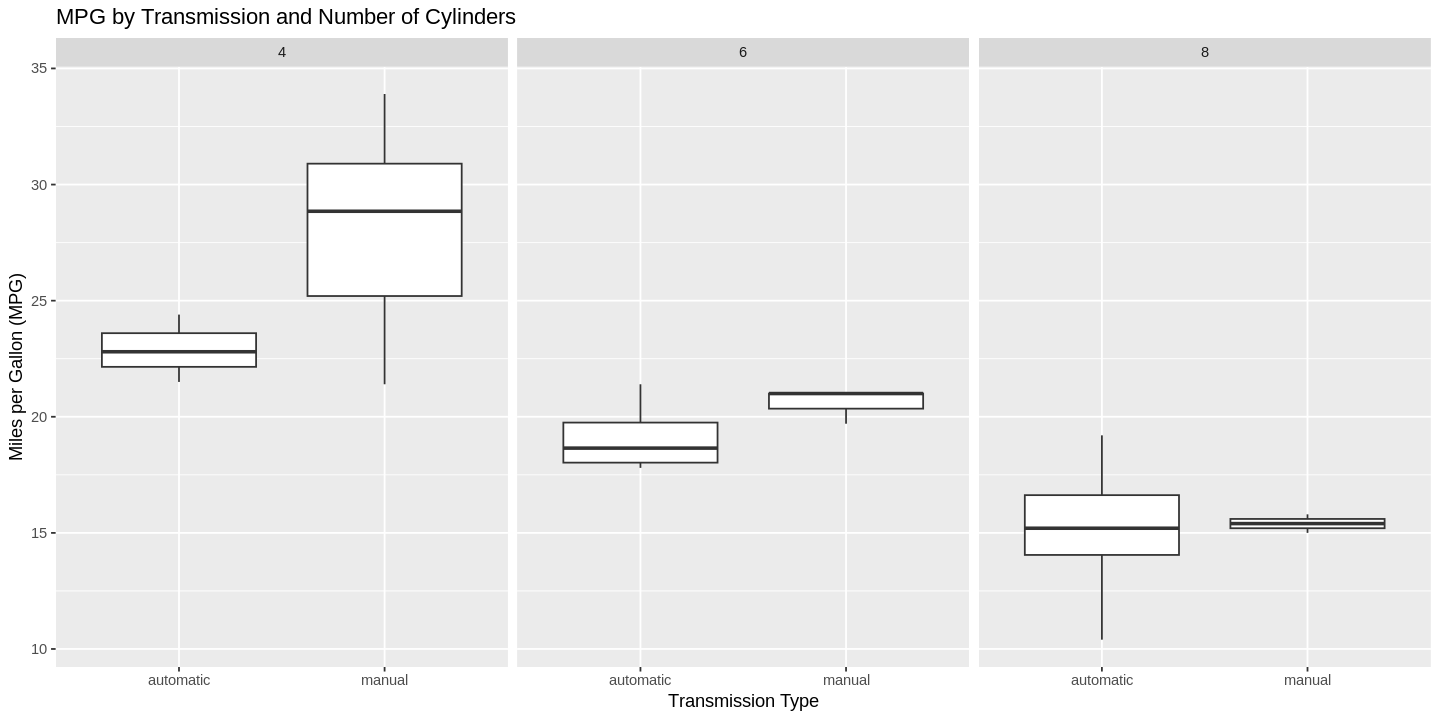

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

# plotting mpg histograms using facet_wrap()
ggplot(mtcars, aes(x = am, y = mpg)) +
  geom_boxplot() +
  facet_wrap(~ factor(cyl), nrow = 1, ncol = 3) +
  #geom_jitter(width = 0.05, alpha = 0.5) +   # add some jitter
  labs(title = "MPG by Transmission and Number of Cylinders",
       x = "Transmission Type",
       y = "Miles per Gallon (MPG)")

---

<br>

#### Colors

* Thus far, we have relied on `R` and `ggplot` to determine the colors for us

* However, ~10% of the population is color blind

* Unfortunately, the default colors in `ggplot2` aren't very colorblind friendly

* But we can change the colors to be more colorblind friendly

* The `RColorBrewer` package enables us to change our color scheme to be colorblind friendly

* We can view these colorblind-friendly colors using the script below

* The first block of colors (`"YlOrRd"` to `"Blues"`) are better for numeric variables

* The second block `"Set2"`, `"Paired"`, and `"Dark2"` are better for categorical variables

* The last block `"RdYlBu"` to `"BrBG"` consists of divergent color spectrums
  * Divergent color spectrums are better for numeric variables when there is a middle reference value, such as zero

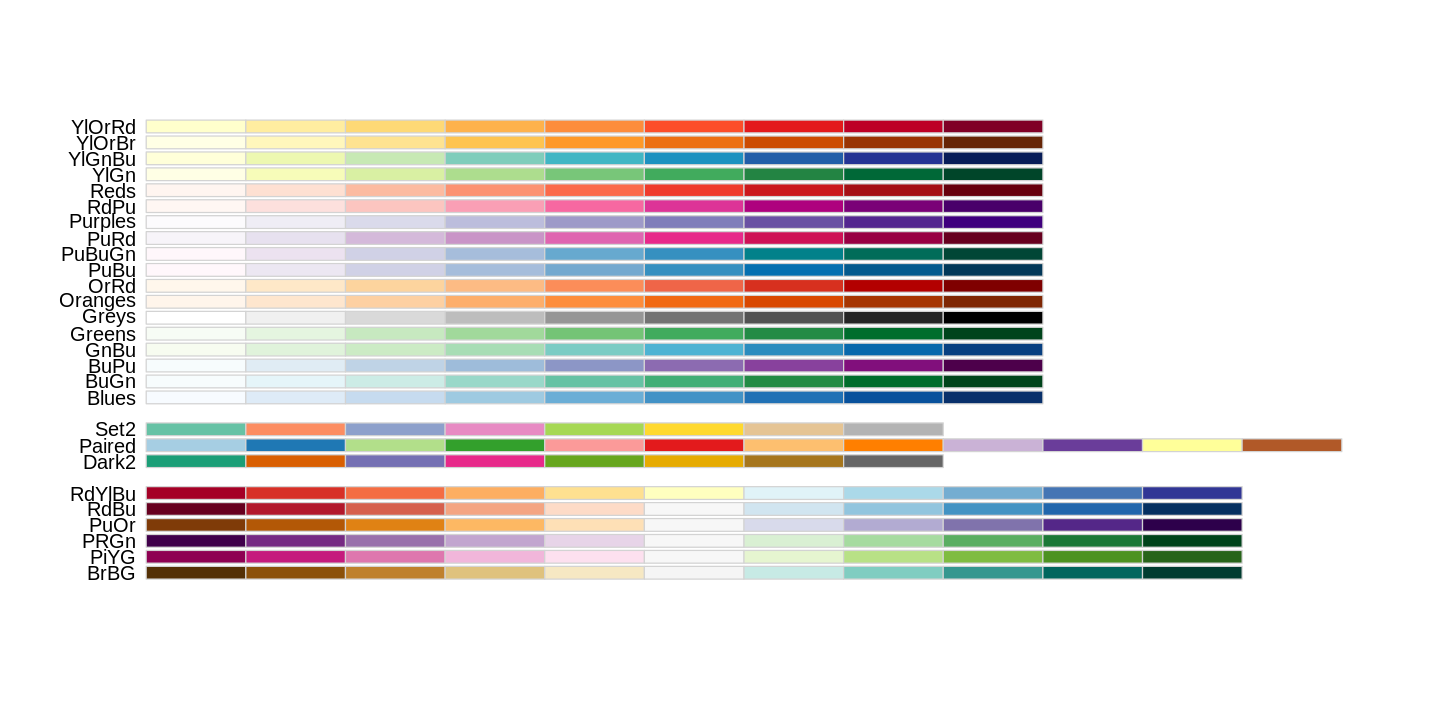

In [ ]:
# show color blind friendly palettes
display.brewer.all(colorblindFriendly = TRUE)

##### Colorblind-friendly colors for categorical variables

* To customize colors for categorical variables, we must

  1. add the layer `scale_color_brewer()`

    * `scale_color_brewer(palette = "Set2")` uses the `"Set2"` palette in our `ggplot`



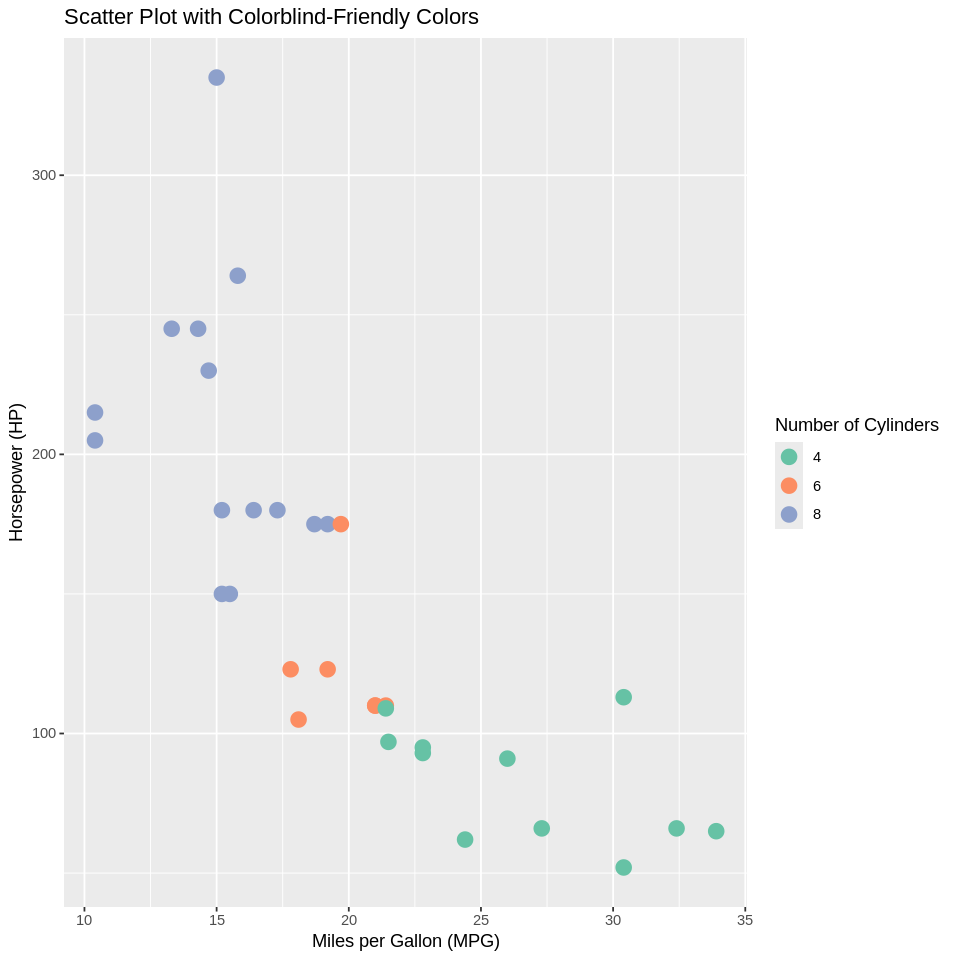

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Create a scatter plot using colorblind-friendly colors
ggplot(mtcars, aes(x = mpg, y = hp, color = factor(cyl))) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Set2") +  # Use colorblind-friendly palette "Set2"
  labs(title = "Scatter Plot with Colorblind-Friendly Colors",
       x     = "Miles per Gallon (MPG)",
       y     = "Horsepower (HP)",
       color = "Number of Cylinders")

##### Colorblind-friendly colors for numeric variables

* To customize colors for numeric variables, we must

  1. Create a palette using `brewer.pal()`

    * `brewer.pal(n = 9, name = "YlOrRd")` creates 9 colors from the `"YlOrRd"` color palette

  2. Convert our palette to a continuous color spectrum using `colorRampPalette()`
  
    * `colorRampPalette(brewer_palette)(100)` create a spectrum of 100 colors from the color palette

  2. We then add the layer `scale_color_gradientn()`

    * `scale_color_gradientn(colors = my_palette)` uses our defined palette in our `ggplot`



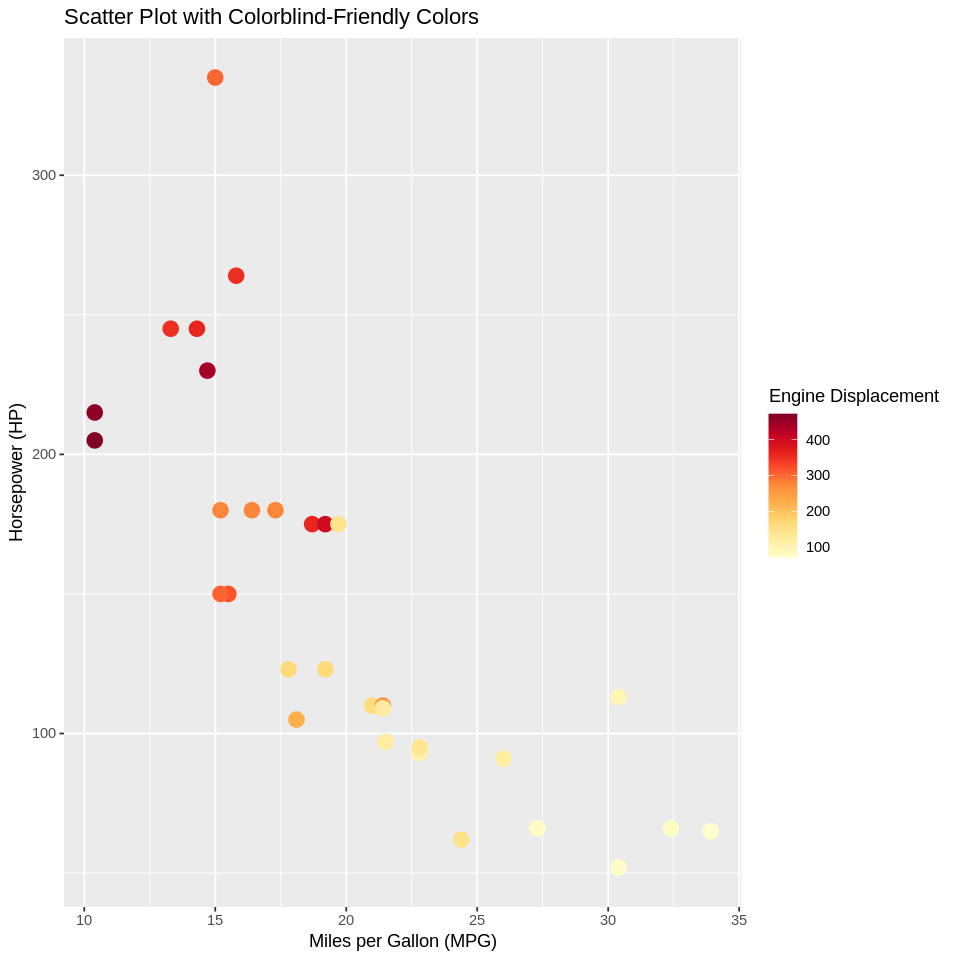

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# create colorblind-friendly color palette for numeric variable
brewer_palette <- brewer.pal(n = 9, name = "YlOrRd")
my_palette     <- colorRampPalette(brewer_palette)(100)

# plot ggplot using defined color palette
ggplot(mtcars, aes(x = mpg, y = hp, color = disp)) +
  geom_point(size = 4) +
  scale_color_gradientn(colors = my_palette) +  # Use colorblind-friendly palette "Set2"
  labs(title = "Scatter Plot with Colorblind-Friendly Colors",
       x     = "Miles per Gallon (MPG)",
       y     = "Horsepower (HP)",
       color = "Engine Displacement")

* Example with a divergent color palette

* Here, we plot deviations from the average displacement

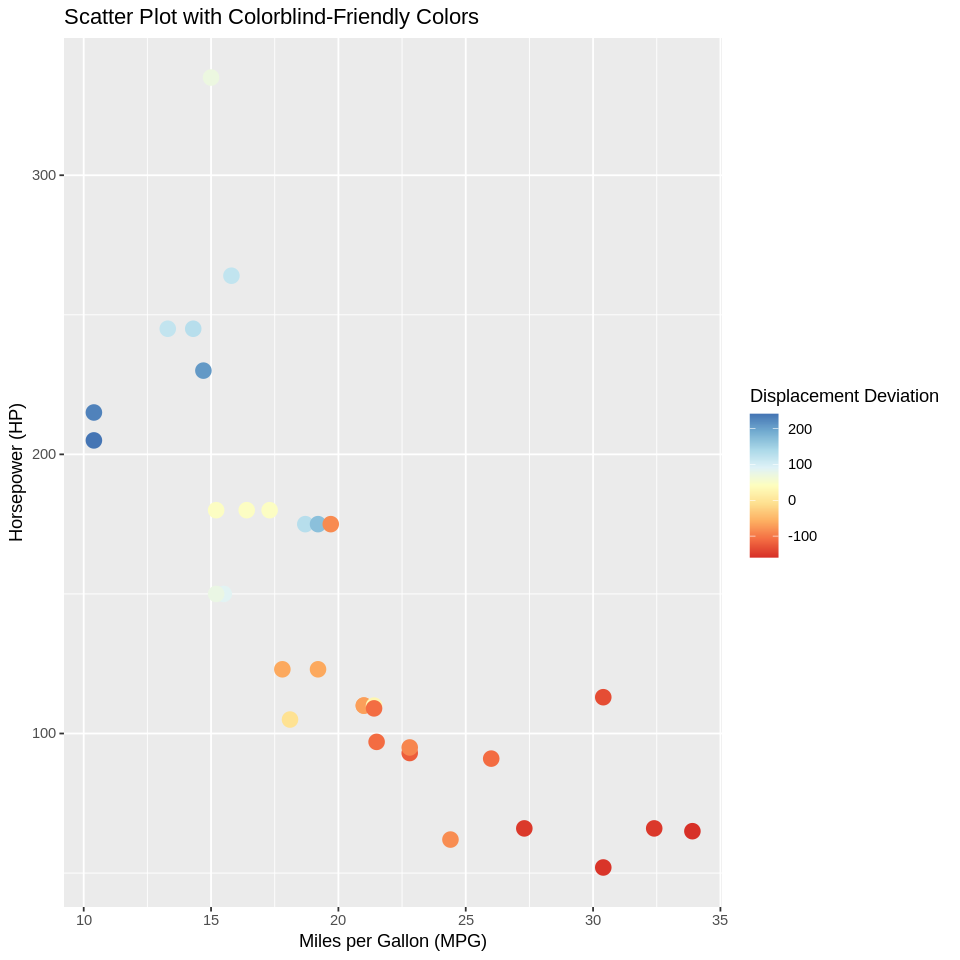

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# calculate displacement deviation from mean
mtcars$disp_change <- mtcars$disp - mean(mtcars$disp)

# Create a scatter plot using colorblind-friendly colors
brewer_palette <- brewer.pal(n = 9, name = "RdYlBu")
my_palette     <- colorRampPalette(brewer_palette)(100)

# plot ggplot using defined color palette
ggplot(mtcars, aes(x = mpg, y = hp, color = disp_change)) +
  geom_point(size = 4) +
  scale_color_gradientn(colors = my_palette) +  # Use colorblind-friendly palette "Set2"
  labs(title = "Scatter Plot with Colorblind-Friendly Colors",
       x     = "Miles per Gallon (MPG)",
       y     = "Horsepower (HP)",
       color = "Displacement Deviation")

---

<br>

### Other Visualizations in `ggplot2`

* Thus far, we have visualized the distribution of numeric variables using a histogram

* Sometimes it helps to visualize this distribution as a continuous function (density)
  * More on this in your future classes!

* The geometry layer `geom_density()` plots the density of a variable
  * You must specify `after_stat(density)` as the `y` argument in the aesthetic mapping


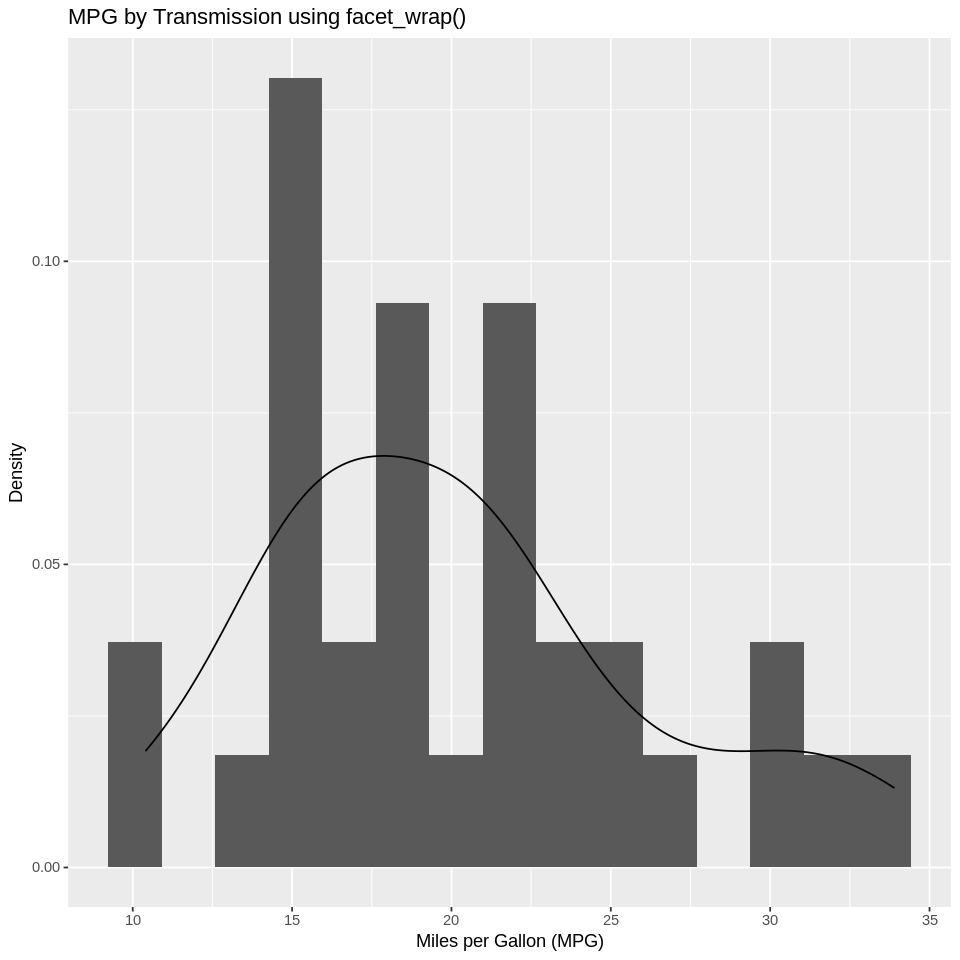

In [ ]:
# plotting mpg histograms using facet_wrap()
ggplot(mtcars, aes(x = mpg, y = after_stat(density))) +
  geom_histogram(bins = 15) +
  geom_density() +
  labs(title = "MPG by Transmission using facet_wrap()",
       x     = "Miles per Gallon (MPG)",
       y     = "Density")

* A nice variant of a boxplot is the violin plot

* Violin plots show the same information as a boxplot, except the boundaries of the boxes (i.e. violins) show the density!

* These plots are created using the geometry `geom_violin()`

Warning message:
“Removed 185 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 185 rows containing missing values or values outside the scale range
(`geom_point()`).”


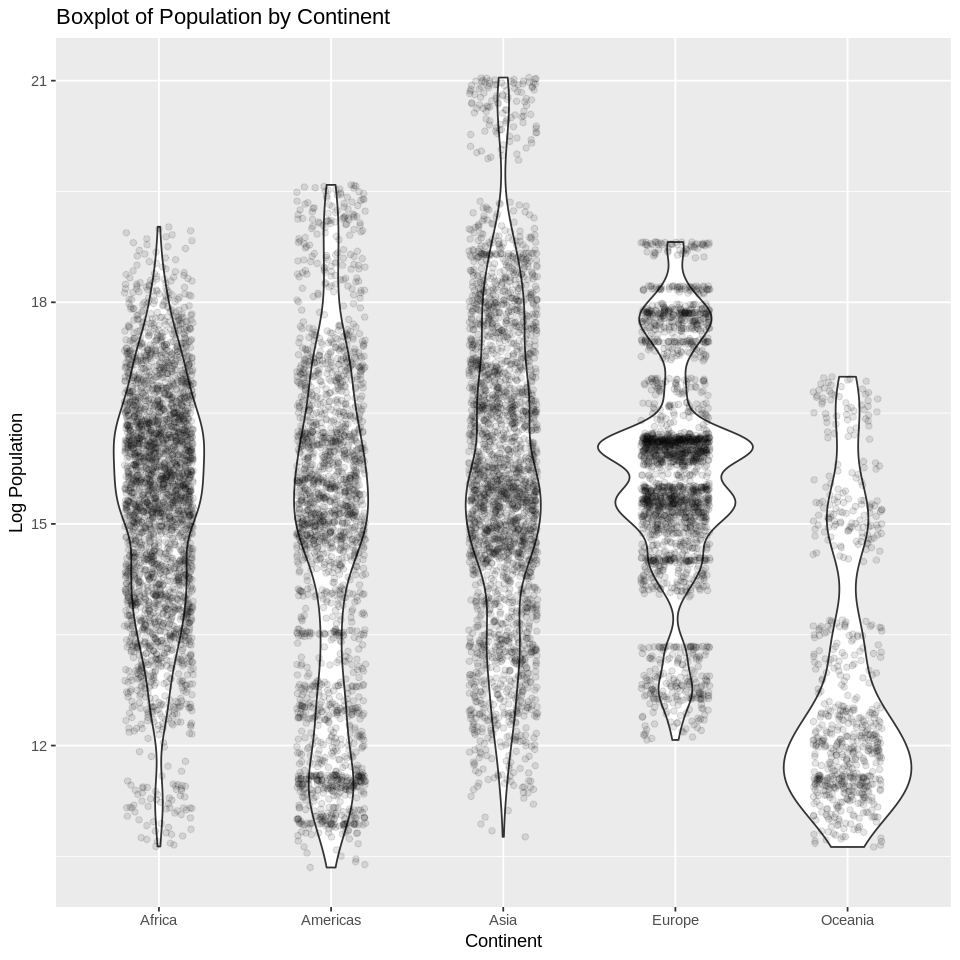

In [ ]:
# plot with log population
ggplot(data = gapminder, aes(x = continent, y = log(population))) +
  #geom_boxplot() +
  geom_violin() +
  geom_jitter(width = 0.2, alpha = 0.1) +
  labs(title = "Boxplot of Population by Continent",
      x     = "Continent",
      y     = "Log Population")

Great follow-up — yes, let's **double-check**. Here's a breakdown of what I extracted from the lecture transcript vs. what the professor emphasized most **repeatedly or strongly** — the ideas they were *adamant* about or returned to several times. I’ll cross-reference them to make sure nothing essential was missed.

---

## ✅ **Key Concepts Strongly Emphasized by the Professor (and Confirmed Included):**

| Concept | Mentioned Repeatedly / Emphatically in Lecture | ✅ Included in Summary |
|--------|--------------------------------------------------|------------------------|
| **Always include 0 in bar plots** | Stressed multiple times as ethical, especially with misleading media examples | ✅ Yes |
| **Avoid 3D plots for 2D data** | Repeated warnings, showed bad examples and clarified when 3D is okay (only for interactive real 3D data) | ✅ Yes |
| **Ordering categorical axes** | Reiterated importance in both bar plots and box plots, to aid comparison | ✅ Yes |
| **Add raw data to box plots** | Used jitter as an example, stressed it's helpful for transparency and reliability | ✅ Yes |
| **Use log transformations for skewed data** | Clearly explained why (e.g., population distribution), showed before/after visuals | ✅ Yes |
| **Line plots for time series data** | Reiterated that time-based data should not be shown as scatter only | ✅ Yes |
| **Use consistent axes when comparing groups (facet_wrap)** | Described unethical practices with non-shared axes, and gave multiple examples | ✅ Yes |
| **Use colorblind-friendly palettes** | Explained population-level relevance and how defaults fail, introduced RColorBrewer | ✅ Yes |
| **Different palette types for different variable types** | Carefully distinguished between sequential, diverging, and categorical palettes | ✅ Yes |
| **Violin and density plots for richer distribution insight** | Emphasized improvement over plain boxplots and histograms | ✅ Yes |
| **Goal: Communicate effectively *and* ethically** | Framed this as the purpose of the whole lecture | ✅ Yes |

---

## 🧠 Minor Mentions or Contextual Points (Handled Appropriately)

| Concept | Mentioned Briefly | ✅ Included or Appropriately Omitted |
|---------|--------------------|-------------------------------------|
| Use of `ifelse()` and manual highlighting | Used for visual emphasis on specific points | 🚫 Omitted (code-specific) |
| Explanation of `facet_wrap(~ am)` syntax | Explained as a tool | ✅ Faceting included as concept |
| Using `jitter width` and `alpha` | Fine tuning visual display | ✅ Conceptually included under transparency and noise |
| Viewing row names for labels | Code-related detail | 🚫 Omitted (correctly) |
| Using `after_stat(density)` for density plots | Syntax-focused | ✅ Density plots included conceptually only |

---

## ✅ Final Verdict

Yes — **all key conceptual points that the professor repeated, emphasized, or framed as essential** were captured in the summary. Anything omitted was either:
- Code/syntax specific  
- Illustrative only (e.g., color of a specific car)

The summary **prioritizes what matters for interpreting and creating ethical, insightful visualizations**, just as the professor intended.

Would you like me to turn this validation into a checklist for review, exam prep, or TA notes?

# Course transcript

Hi class. So welcome to today's lecture, we're already at lecture 21 so today, we're gonna cover a bit more data visualization except although last time we went over some of those basic plots introducing visual dimensions like shape, color, text, and size. We'll cover more a bit about the best practices for creating your data visualizations. We will also cover a bit more about ggplot as well.

It's like there's a typo here that... alright. But first, we're going to install the Ds Labs package. Remember, this package contains a few data sets. In particular, we're going to use the Gapminder data set, which is a data set that we've worked with intermittently throughout the semester along with some other data sets. So we're gonna load the ggplot2 package which will enable us to create additional visualizations.

There's the RColorBrewer package which allows us to infuse some better colors within our plots that are more colorblind-friendly.

I just want to emphasize that these two are not required for installation in Colab, because they're already pre-installed. So we simply need to load these libraries. And finally, yes, the Ds Labs library.

Again, today, we're gonna cover a bit more principles and best practices for creating your data visualization.

Now, when creating plots or data visualizations, there are many principles to consider, and some are more widely accepted or more conventional than the others. Now these principles are considered best practices to align our data visualizations with our own scientific understanding of how humans, you know, detect and compare patterns visually within these plots.

So essentially, in other words, we want to make it as easy as possible for humans to interpret our data. And obviously, the first step is to create a visualization.

Now remember, the goal of data visualization is to effectively, and I'm emphasizing here, ethically communicate information to your intended audience. And this means, even if the audience is yourself—like, if you're performing some initial exploratory analysis—you want your data visualization to effectively communicate the information to yourself.

We want to do so ethically, so we do not want to mislead any findings to our audience or yourself as well.

Now, although there are many ways—many, many ways—to visualize our data, some approaches are more effective than others. In the next few videos, we're going to cover these approaches.

Another item for best practices when creating your data visualizations is the inclusion of the 0 value on your axis within bar plots—always include 0.

When using bar plots to display data, it actually can be misleading or even unethical, especially with your intentions, if you exclude 0 from your plot because it distorts the differences between the two quantities within your bar plot, right? So as a rule of thumb always include 0 in your bar plots unless there's some really compelling reason you don't.

So an example is this plot below. It was reported on some partisan news channel—Fox News Channel, which is known to be conservative and right wing.

And it's on the number of apprehensions at our Southwest US border—we are in San Diego, so that's close by. Now, since the plot does not include 0, at first glance, it appears that the number of apprehensions are increasing exponentially—not only that—during the year 2013, if we ignore the numbers, it looks as though the number of apprehensions more than doubled. And this is designed to mislead you into thinking that there is a much larger increase in number of apprehensions than there actually are.

But if we were to include 0, you can see the true nature of our data set. There is an increase, but it's much less pronounced. It's nowhere near more than double the increase in number of apprehensions.

So in this plot in particular—or this plot up here—excluding 0 from these plots is very misleading, and I would say, it's unethical, because the audience may not have the knowledge to see past this bias of excluding 0. Right? So you want to make it as easy as possible to convey the conclusion that you're coming to. I just emphasize here that it is your responsibility to ensure that you convey the proper message to your audience. And part of what that means is avoiding pie charts, right, and including 0 within these bar plots.

So I just want to show you a few more examples here. This looks like something about the tax cuts under the Bush administration. You could see that if we compare them, this looks like it's 5 times the increase or something like that. Or if this is current—5 times the decrease. However, if you were to compare them while including 0 in a bar plot, the difference is obviously not as large as you perceive without this inclusion of 0 on the axis. Very misleading to have just 34 to 42 here.

Here's another one. I believe this is the presidential election in 2013 in Venezuela. You could see there's a lot of things wrong with this. First of all, there's no real scaling. Second of all, you're plotting in 3D. And I'll talk about that in a bit. You should not plot 2D data in 3D—ever.

But another thing is because there's no axis, there's no 0 present, and it looks like this person has a hundred times the votes of this other person, when in fact they are virtually equal. So extremely misleading by that news outlet as well.

Now when should we not include 0?

Well, again, I say always include 0 for bar plots. But we don't need to include 0 if including 0 makes it difficult to make comparisons. Or if you're visualizing relationships relative to the variability of data points instead of just plotting a single number. You might want to plot several numbers, and this tends to be the case in histograms, scatter plots, and box plots.

Another reason would be if 0 is not conceptually relevant.

But for the most part, you typically don't have to include 0 unless there is a good reason—for histograms, scatter plots, and box plots.

As an example, here, we've included 0 on this plot on the left, which is kind of like a box plot, except we're plotting the actual points, and we've excluded 0 on the plot on the right.

Now, if we included 0, we could see that it doesn't really include much additional information. There's a ton of white space here, and it makes it difficult to compare these groups simply because we're zoomed out.

So we can zoom in here. I've seen in practice sometimes people plot both just to show you what the data look like with and without 0 on the axis as well, which is a nice approach if you're concerned about that.

Here's another sort of rule of thumb for best practices when creating data visualizations.

So in general, most of the time—the majority of visualizations you create—you are going to want to avoid creating three-dimensional plots.

In particular, you should always avoid plotting 2D data in a 3D rendering.

And I say, here, it's 2D data, so why are you gonna complicate it by plotting it in 3D? It's just gonna make the visualization more confusing. So an example here is—this is a 2D bar plot, but for some reason they made it 3D. And what this does is, it distorts the comparison—the spatial comparison—between the two bars. Right? All you're doing is confusing the audience.

Same thing here. If you're going to do a pie chart—which I don't even recommend—but if you are, why do it 3D?

This slice probably seems a lot smaller now because it's further away in this 3D rendering. So avoid plotting in 3D, especially if your visualization could be plotted in 2D.

Here's another one where we have this line graph, but it's 2D plotted in 3D again. So what's confusing about this? Because the scales are distorted. I ask you this—if we were to compare drug A to drug C at this log dose of 9, would you say that they're different from each other? The response—the survival—is it different?

Well, in this visualization it appears that they're similar.

But if we were to plot this in 2D, which makes much more sense, you could see that obviously drug A has a higher survival rate. So already you're misleading your audience by plotting a 2D plot in a 3D rendering.

Now, when should we plot in 3D?

Well, like I said, you tend to want to avoid this. But it is reasonable to plot data in 3D if the data you want to plot is actually 3-dimensional. For example, if you're going to plot a scatter plot across 3 axes instead of 2. So if you have an X, Y, and Z axis.

The thing is, it's still quite difficult to interpret a 3-dimensional scatterplot if it's what we call static or not moving. So I would recommend only plot 3D data if you can introduce some sort of movement or activity—interactivity. So what I mean by that is, I'll click this example here.

And it goes to this page. It just kind of reiterates on these 2D to 3D plots. You just don't do pie charts. Don't plot in 3D if it's a static scatter plot. However, if you have an interactive 3D plot, it makes it a lot nicer. Although you can still avoid this. But here, I'll click on this plot, and you can drag and move it around, so it gives you a better understanding of the relative relationships between each axis here. So you're not confusing it by distorting or representing a 3D image on a 2D sort of screen.

Now, what is better than having 3 axes? Well, you could just include color, shape, size, or text. That technically is another dimension of your visualization, except it's much more interpretable on a 2D screen or a 2D plane.

All right. So now we're going to jump into plotting some bar plots and box plots and the best practices for those.

You don't need to do this all the time, but oftentimes it makes more sense to order your categories and your bar plots and box plots based on some metric like the magnitude or the mean, and I'll go into what that means in a second.

The reason why you want to order your categories in your plot is because it just makes it easier to compare your data across groups.

An example here is a bar plot. It's quite a bit of code, and I'll explain that. But it visualizes miles per gallon of a vehicle from the mtcars data set. That's all it does. It's plotting mpg for each car in the data set.

When we plot this, the vehicles are not ordered by mpg.

I've highlighted this in red. You don't need to understand the colorization here. Just understand the concept. We have a bar plot. We have mpg on the y-axis for each car, and it's not ordered by the magnitude of mpg.

So I ask you this, which vehicle, based on that visualization, has a better mpg: the Mazda RX4 or the Volvo 142E? The Volvo is this car here, and the Mazda is here.

And if you kind of stare and squint, you could kind of see that this might have a bit better mpg, but honestly, because they're not next to each other or adjacent to each other, it's very difficult to compare these two cars. This is where ordering your bar plot will make more sense.

Before I go into that, I just want to explain a few things here.

The way I've created this plot is: took all the row names of that dataset and made it another column called Car.

Then I use this ifelse statement to create another column where, if a car is either one of these two cars, then I make it a car of focus. If it's not, I just create another variable “Other”.

This is just trying to colorize those cars of focus as red.

Then I create a ggplot with my dataframe mtcars. Within my aesthetic mapping, I want to plot the car on the x-axis and mpg on the y-axis, and then I'm filling the bar plot based on what kind of car or what value it is on the highlighted variable. So basically, if it's a car of focus, I want it red; if it's not, I make it gray.

Now, going back to the original purpose of this video.

What if we ordered that data by mpg? What I'm going to do here is use this function reorder. I have all the code the same, but I'm going to say I want to reorder this variable—so that is the name of the car—based on mpg.

The minus symbol represents decreasing order. So I'm going to reorder this car variable in decreasing order by mpg, but I'm going to plot everything the same as usual.

Now it's much more obvious, the difference between the mpgs of the Volvo and the Mazda. The Volvo is obviously larger, but not by much. This is a nice visualization here.

Now for box plots. You can also order the categories, and you can order them by pretty much any quantity—mean, median, interquartile range, or variance. I would order them typically by mean or median, since that's what's commonly used.

If I plot a box plot here without ordering, this is plotting mpg on the y-axis versus the number of carburetors on the x-axis. You can see that it's somewhat ordered, but this is a little higher and this is a little lower, so we may want to order this to make the visualization a bit clearer.

With ordering, we can use that reorder function again. So we say, I want a ggplot of the dataframe mtcars with the aesthetic mapping where the x-axis is basically the carburetor—the number of carburetors—but reordered by decreasing mpg.

Using the median. So again, the aesthetic mapping on the x-axis is just the number of carburetors ordered by the median mpg in decreasing order.

If I run this, you see that it's now completely decreasing by the median. Maybe not for this visualization, but in other visualizations, this can be very helpful in terms of comparing groups.

When creating something like a box plot, sometimes you see a comparison: “Oh, number 3 carburetors has a higher median than the number 4 carburetors according to mpg.” But you're not sure how many data points are in this category.

So for complete transparency, it might help to show your actual data when plotting box plots.

We can do this using a layer or geometric layer called geom_jitter. Jitter just means infusing noise. You're going to perturb it a little bit so it varies a little more.

The amount of perturbation or the amount of noise you infuse is with this width argument, and alpha is just transparency.

Geom_jitter includes the actual data with some variation in the x-axis direction.

This is the same plot as before, except I'm adding this additional geometry layer.

Notice what it does: it adds the data points into our box plot. So now we know this is not very reliable because there's only three data points in it. These flat lines obviously just have a single data point—that's why they're just a single line, because the median is that data point value.

You could change the width to make the points have more noise in the x-direction. Instead of 0.05, you can make it 1.0. Now they’re all over the place.

A rule of thumb is just to keep the jitter width small enough to stay within the box plot.

Alpha messes with the transparency. If I set it to 1, the points will be solid black. If I set it to something small like 0.1, they’ll be much more transparent, almost invisible.

This is geom_jitter. Feel free to add these to your box plots. It really gives you an understanding of the number of data points and the distribution of data points within your box plots.

Something else you can do in your data visualizations are transformations. This literally means: do you want to square your data or log-transform your data? When you apply these transformations to your variables, it can make your visualization easier to interpret.

One of the most common transformations is the log transform. If your data are severely right-skewed, it's very common to log-transform your data, which pulls back those very large, right-skewed values to make your visualization easier to interpret.

Other transformations can be used depending on the shape of your distributions, but to be honest, log transforms are probably the ones used most commonly for right-skewed data.

An example here is a script which plots population versus continent from that Gapminder dataset. We use a box plot using the boxplot geometry and plot continent on the x-axis and population on the y-axis.

Notice here—this is not very informative. All the medians are smushed down toward the bottom, and this is because the distributions are very right-skewed.

What I mean by that is: if I were to plot the distribution using geom_histogram for population, you'd see that this is highly right-skewed.

But what a log transformation does is it pulls these large values toward the density of the distribution.

If I did log(population), your distribution is much more interpretable—but it's on the log scale.

I can re-plot this box plot with log population, and already you see that for each continent, comparing log populations is much more interpretable.

Here, skewness made it difficult to compare groups. With log transformation, it's obvious that Oceania has a far smaller population than the remaining continents.

So we haven't dealt too much with data that's observed over time. But, as a general rule, when plotting data over time, you should always plot with either a line or a line with points.

So when plotting data over time do not plot with just points only. There are some situations where you might want to. I'm not sure what those are, but convention is to plot any data over time as a line or a line with points.

And the way we can do this is using the geom_line geometry. So what I'm gonna do here is I'm gonna subset all of the rows in our Gapminder dataset where the country is equal to United States.

And I'm going to plot the US data in a scatter plot where I have year on the X-axis — so it's time — and fertility on the Y-axis.

And then I'm going to add this geom_line geometry, which will plot that data over time as a line.

So I'll do that here. And here you have this continuum of time, and you observe that US fertility significantly dropped up until the eighties and it sort of started increasing a little bit, but nowhere near what it was in 1960.

If you wanted to plot it with points instead of just only the line geometry, you would want to add the point geometry here.

And you could plot it with points. Now, what you don't want is just to plot it...

This is what you don't want, right? This looks like just a simple scatter plot. But remember, these points are contiguous or adjacent in time. So we convey that idea by plotting them as a line.

So another convention in data visualization that is a good practice is to always use common axes, especially when you're comparing two plots. And one way you can do this is using a function called facet_wrap. So this is another layer you can add to your ggplot.

When plotting multiple plots for a comparison, you should always use the same axes. It can be very misleading if not. If you don't use the same axes, this can be borderline unethical, especially if you are misleading your audience.

Here's an example of that. I'm going to plot two histograms here that visualize miles per gallon for automatic and manual transmission.

Notice here we have all the cars that are automatic, and then all the cars that are manual. This line up here just converts the am variable to a factor with these levels.

Now, because these two are plotted on their own respective axes, it appears that they have a similar average mpg. So it looks as though automatic transmissions, without looking at the axes, is about centered over the same mpg, so they're probably the same miles per gallon. But this is not the case. This range is 10 to 25, and for manual transmissions, 15 to 30. So manual transmissions actually have a larger mpg than automatic transmission.

And this is all because we're using different axes for these two plots which are aligned with each other.

Now, a way to enforce the same axes is that function or layer called facet_wrap. The script below uses this function facet_wrap, which plots the histograms of mpg by each value of our am variable for automatic or manual transmission. And it does so in two rows and one column, right? So it's going to create a 2 by 1 plot where each row is a plot and each column is a plot.

Notice here I have ~am. That's how you specify the variable you would like to visualize.

So what I'm going to do here is plot the data frame mtcars with mpg on the x-axis as a histogram. But I'm going to facet_wrap(am), so I'm going to plot two histograms, one for each unique value of am, as two rows in one column.

Okay, so it looks very similar to what we had before, except notice here the axes are common to both plots. So now we show it's more visible that the manual transmissions have higher mpg in distribution than the automatic transmissions.

facet_wrap also allows you to plot multiple variables on the axis. So you can plot two variables using that tilde symbol. So you would have this facet_wrap layer again, except here I'll plot gear ~ am, so two variables for mpg. I'm going to do gear and am, but I'm going to create a 2 by 2 plot, so I'll have two rows and two columns.

Right? So here you have all the same axes — 0 to 3, 0 to 3, 10 to 35, 10 to 35. Now honestly, there isn't much data to visualize the data in this way, but this is just the tool that you can use in your practice in your data analysis.

Just to show you how this works: say I have four plots, and I want them all in the same row. I could have a single row with four plots, so they're all side by side. And so on. And then you can change the width if you wanted to make it less distorted. Right? And so on. So I'm going to convert it back.

And that is your facet_wrap.

And last time when we were plotting box plots, we visualized multiple categorical variables and box plots using this fill argument. Right? So if I wanted to plot a box plot of Mpg versus automatic versus manual transmission, we had something like this.

But if I wanted to plot an additional dimension, such as the number of cylinders, I can plot this box plot here. So this basically plots the Mpg versus this am variable, but then uses color to fill each different cylinder. So we're able to compare across not only transmission type but the number of cylinders.

Here, you see that it says factor(cyl). We can easily change that name to Cylinders here.

Now, we can also do this — it’ll look a little different, but it’s the same idea. We can use facet_wrap. So if we're plotting Mpg versus transmission type using a box plot, we can add a facet_wrap layer with one row and three columns where we visualize across the different cylinders.

So essentially, what this does is, it creates a box plot of Mpg versus transmission type, but does so for each unique value of cylinder.

So just comparing — it depends on what you want and what's best for your purposes when presenting to an audience.



Like colors. Now, this is kind of a loaded topic, but I'll do my best in terms of telling you how to change certain colors using ggplot, although, like in the past, I highly recommend looking at online resources to supplement your knowledge as well, just because ggplot is such a massive package.

So thus far we've relied on R and ggplot to determine the colors for us. If we go back up to this box plot, it just says, "Alright, I'm gonna make these 3 categories red, green, and blue."

The thing is, 10% of the population is actually colorblind—some degree of colorblindness. Unfortunately, the default colors in ggplot, such as the ones here, are not colorblind-friendly. So for equity, we want to be able to change these colors to be more colorblind-friendly if we need to.

That's where the RColorBrewer package comes in, which we’ve loaded earlier in today’s lecture. This package enables us to change our color scheme to be colorblind-friendly.

We can view these colorblind-friendly colors using this script below. I'm going to say display.brewer.all. This says, “I want to see all of the different colors in RColorBrewer that are colorblind-friendly.”

This is our set of colors here. If I did FALSE, you get some other colors there. But let’s just keep it as colorblind-friendly.

This first block here, such as yellow, orange, red all the way down to the blues—these are all better for numeric variables. You can see it's kind of a continuous spectrum of colors, although you can conceivably use them for categorical, but they're better suited for numeric variables.

This last block here is also good for numeric variables. The block on the bottom is a divergent color spectrum, so you could start at the center, and it goes to one side or the other. Divergent color spectrums are better suited for numeric variables where there’s some middle reference value, like a deviation from 0 or a deviation from the mean.

These 3 color spectrums here—you can see how there’s no real continuous gradient of a color—and this is because they're better suited for categorical variables.

Alright. So these are all the colors we can pick from—colorblind-friendly colors for categorical variables. We're going to explore this middle block here.

To customize the colors for a numeric variable—or for a categorical variable—we need to add a layer called scale_color_brewer. What I’m going to do here is show you this plot where all we’re doing is plotting a scatter plot of horsepower versus miles per gallon, and we have added this color visual dimension as the number of cylinders, and we're using the default colors.

But to make them colorblind-friendly, we use scale_color_brewer, shown here. We add that as a layer and specify the palette we would like to use, such as Set2. You'll see a change in colors here. These are colorblind-friendly.

You can also change it to the other one—Dark2. Either are fine. I'll keep it at Set2. So already we've changed the colors to colorblind-friendly for categorical variables.

Now for numeric values, it’s a little more complicated. We need something called brewer.pal. brewer.pal just creates some number of colors. Here I specify 9 colors from some color spectrum.

And then we take our palette that we've stored as brewer_palette, and we insert it into this colorRampPalette function.

We're calling 100 of those. What this function does is it creates a spectrum of 100 colors from this Brewer palette.

So this is now our color palette. These are called hexadecimal formats. These essentially represent colors. Each of these is a color.

We've created 9 of those colors from the yellow-orange-red spectrum. Then, if I show you my palette, we’ve expanded them to 100 different colors. So we have a higher resolution of color within our plot.

Now we can take that and include that in this function called scale_color_gradient, and specify our colors as those 100 colors from our color palette.

This is what our original plot looked like, where we have this color spectrum of blue. That default may not be colorblind-friendly.

Now I’ll include the scale_color_gradient layer which will include engine displacement as a color dimension, but using this color palette that we’ve already created.

So now we have white to red. This is a nice red—what was it—yellow to orange to red color spectrum.

I could show you an example with a divergent color spectrum. Right here I'm using red, yellow, and—I’m not even sure what "Bu" stands for—blue, I guess. So red, yellow, blue.

Remember, I extract my 9 colors from the Brewer palette. Then I create a broader palette of 100 colors from this color palette, and I include it with scale_gradient.

The difference here is I am subtracting the mean from displacement. So I’m plotting displacement change. The point of this plot is to show you that these divergent color palettes are good for deviations from the mean or deviations from 0.

If we interpret this plot, we can see that these cars here tend to have a much larger displacement than the mean with higher horsepower and much lower miles per gallon.


Alright. So we've covered quite a bit today. This will be the last video, and it just covers a couple of other visualizations that might be of use to you. Now I'll emphasize that ggplot2 has so many different visualizations that there's no way to memorize them all. So you need to use your online resources wisely, alright.

So thus far we visualize distributions of numeric variables using a histogram, which is pretty standard.

But sometimes it's better to visualize it, say, as a continuous function or a density.

And you'll learn a little bit more about densities in your future classes, which are just functions that model probability distributions.

Your histogram is just your observation of that distribution, right?

So you could plot these distributions as densities using the geometry geom_density. So you just add this layer

And note that you need to specify after_stat(density) as the y argument if you're going to do this, right?

So here I'm going to say I want to plot mtcars with mpg as my x-axis as in a histogram.

My y-axis will be the density in after_stat, so you need to include this whole thing.

Then I add the histogram layer with 15 bins.

If I run this, you could see already we have densities instead of counts

Right, but we have no function.

Well, that's what geom_density is for.

So if I uncomment that,

Now we have an estimate of the density of this variable. So if this were a continuous function, this is likely what it would look like.

Now, another nice variant of a plot is the violin plot. So this is very similar to a box plot, except violin plots

Have boundaries that show information about the density of your variables. A box plot is just a box, so you can only compare medians and interquartile ranges. Violin plots enable you to compare your data distributions with the box plot.

And this is created using geom_violin. So what I'm going to do here

I'll put box plot in here

Just to show you the differences.

So this is our standard box plot, comparing log population to the different continents. But we have no idea the shape of the distributions. So what we can do is comment out box plot and just plot a violin plot instead.

And now we could compare the different values.

But you can also see that some are right skewed, some are a little more symmetrical after the log transformation.

And then you can even use geom_jitter to add your points with a variation width of 0.2 and your transparency of 0.1.

Just to get a better understanding of your data. So you can see that most of your data is right here in this plot.

I wonder what would happen if I use geom_boxplot with geom_violin.

So you can actually use both. I didn't know that. And this is packed with information because you could see

The medians here. You can adjust probably the width of these box plots here, but this plot is almost probably too much information.

But it is possible.

So that is the violin plot.
